# Carga de librerías


In [1]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning) #Ignorar error de clase o versión

import numpy as np
import pandas as pd 
import seaborn as sns
import seaborn as sb

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans


from numpy import mean
from numpy import std
from sklearn import linear_model
from sklearn import tree

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import decimal
import sklearn
import yellowbrick


from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
from yellowbrick.features import PCA
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.target import FeatureCorrelation
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError

%matplotlib inline

# Algoritmos de Machine Learning

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
print("Ingresa el nombre del archivo a Analizar:")
archivo = input()
archivo = archivo + ".txt"
#SI
#data385Attrib
#cre300
#Slice409

Ingresa el nombre del archivo a Analizar:


 Slice409


# Carga de datos

In [4]:
#Solo carga y lectura de los parámetros del conjunto de datos
df = pd.read_csv(archivo, sep = " ", header = None, names = ["a", "b", "c"])
Elem = df["a"][0]
Attr = df["a"][1]
NumClas = df["a"][2]
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
print("Número de Elementos: ")
print(Elem)
print("Número de Atributos: ")
print(Attr)
print("Número de Clases: ")
print(NumClas)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

--------------------------------------------------------------------------------------------------------------------------------------------------------------------


Número de Elementos: 
409
Número de Atributos: 
385
Número de Clases: 
6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [5]:
#Cargar y lectura total de los datos del conjunto
df2 = pd.read_table(archivo, header = None, sep = ",",skiprows = 3)
print(df2)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

          0         1         2         3         4         5         6    \
0    0.622490  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    0.630137  0.400524  0.421793  0.850483  0.734300  0.000000  0.000000   
2    0.657718  0.773077  0.850657  0.753205  0.000000  0.000000  0.000000   
3    0.683544  0.573705  0.323887  0.824176  0.728665  0.000000  0.000000   
4    0.000000  0.000000  0.000000  0.000000  0.196364  0.947141  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
404  0.142292  0.299413  0.000000  0.000000  0.000000  0.790510  0.910816   
405  0.142857  0.000000  0.000000  0.000000  0.000000  0.581470  0.977459   
406  0.153846  0.334586  0.000000  0.000000  0.000000  0.000000 -0.250000   
407  0.154762  0.000000  0.000000  0.000000  0.000000  0.000000  0.641105   
408  0.160920  0.000000  0.000000  0.923773  0.608762  0.000000  0.000000   

          7         8     9    ...  376      377       378       379  \
0  

In [6]:
#Número de Atributos
numAttri = len(df2.columns) #o =Attr
#print("Número de Atributos:")
numAttri1 = numAttri-1
#print(numAttri1)
numclas = NumClas
#print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

# División de la matriz del Conjunto de Datos en 2 partes


In [7]:
#Clasificadores con datos puros*
#Separo todos los datos con las características y los resultados
X = np.array(df2.drop([numAttri1], 1))
y = np.array(df2[numAttri1])

In [8]:
print("Ingresa la proporción del conjunto de datos (debe estar entre 0.0 y 1.0 )")
proporcion = input()
proporcion = float(proporcion)
#0.2

Ingresa la proporción del conjunto de datos (debe estar entre 0.0 y 1.0 )


 .2


In [9]:
#Separo los datos de "train" en entrenamiento y prueba para testear los clasificadores

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = proporcion)
deTr = format(X_train.shape[0])
deTe = format(X_test.shape[0])
print("Datos para Entrenamiento:")
print(deTr)
print("Datos para prueba:")
print(deTe)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Datos para Entrenamiento:
327
Datos para prueba:
82
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [10]:
#Escalado de funciones
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
#Asignación del número de componentes
print("Ingresa número de componentes")
numComp = input()
numComp = int(numComp)

Ingresa número de componentes


 2


--------------------------------------------------------------------------------------------------------------------------------------------------------------------




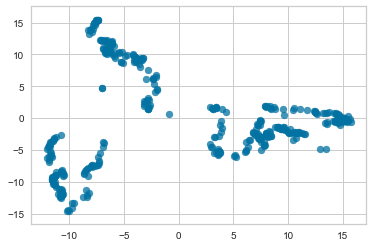

In [12]:
#Pequeña muestra de la gráfica de PCA, más adelante es la definitiva*
pca = PCA(n_components = numComp)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

# Análisis de Datos

In [13]:
print("Información del Conjunto de Datos")
print(df2.info())
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Información del Conjunto de Datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Columns: 386 entries, 0 to 385
dtypes: float64(381), int64(5)
memory usage: 1.2 MB
None
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [14]:
print("Descripción del Conjunto de Datos:")
print(df2.describe())
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Descripción del Conjunto de Datos:
              0           1           2           3           4           5    \
count  409.000000  409.000000  409.000000  409.000000  409.000000  409.000000   
mean     0.122035    0.071695    0.053145    0.083291    0.153024    0.227641   
std      0.251528    0.218227    0.203629    0.257929    0.317555    0.363824   
min      0.000000    0.000000    0.000000    0.000000    0.000000   -0.250000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.036254    0.428415   
max      0.973369    0.968894    0.985334    0.983421    0.959741    0.976167   

              6           7           8           9    ...         376  \
count  409.000000  409.000000  409.000000  409.000000  ...  409.000000   
mean     0.081223    0.017183   -0.039563   -0.240220  ...    0.159001   
std      0.33

In [15]:
#Número de Atributos
numAttri = len(df2.columns)

In [16]:
print("Distribución de atributos:")
print(df2.groupby(df2.iloc[:, numAttri1].values).size())
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Distribución de atributos:
0     51
1    198
2     21
3     22
4     42
5     75
dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [17]:
#Colores Random
number_of_colors = 8

color1 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

# Datos en las matrices


In [18]:
print("Conjunto de elementos")
print(X)

print("\nClases")
print(y)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Conjunto de elementos
[[ 0.62249   0.        0.       ...  0.        0.       27.937052]
 [ 0.630137  0.400524  0.421793 ... -0.25     -0.25     11.468284]
 [ 0.657718  0.773077  0.850657 ... -0.25     -0.25     13.492684]
 ...
 [ 0.153846  0.334586  0.       ... -0.25     -0.25     22.210732]
 [ 0.154762  0.        0.       ...  0.        0.       28.488313]
 [ 0.16092   0.        0.       ... -0.25     -0.25     11.9806  ]]

Clases
[4 4 4 4 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 

# Normalización


In [19]:
#Apliqué una transformación de los datos para poder aplicar la distribución normal
X_std = StandardScaler().fit_transform(X)

# Cálculo de autovectores y autovalores.

In [20]:
# Calculé la matriz de covarianza
print("NumPy Matriz de covarianza: \n%s"
      %np.cov(X_std.T))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

NumPy Matriz de covarianza: 
[[ 1.00245098  0.60434026  0.53440219 ...  0.0322023   0.30894633
  -0.12732598]
 [ 0.60434026  1.00245098  0.92768216 ... -0.06441514  0.08376645
  -0.17105834]
 [ 0.53440219  0.92768216  1.00245098 ... -0.13213667 -0.03718349
  -0.23257966]
 ...
 [ 0.0322023  -0.06441514 -0.13213667 ...  1.00245098  0.56035295
   0.80119143]
 [ 0.30894633  0.08376645 -0.03718349 ...  0.56035295  1.00245098
   0.33650005]
 [-0.12732598 -0.17105834 -0.23257966 ...  0.80119143  0.33650005
   1.00245098]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [21]:
# Valor propio y Vector Propio de la matriz
covMat = np.cov(X_std.T)

propiVal, propiVec = np.linalg.eig(covMat)

In [22]:
print("Vectores propios \n%s" %propiVec)

print("\nValores propios \n%s" %propiVal)

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Vectores propios 
[[-0.00621603+0.j  0.03466575+0.j -0.08588662+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.00137193+0.j  0.01020294+0.j -0.09378542+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.0063947 +0.j -0.00450224+0.j -0.09610198+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 ...
 [-0.10151451+0.j  0.02887224+0.j  0.02410357+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-0.05639967+0.j  0.09564419+0.j  0.00138172+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-0.08686021+0.j -0.00810395+0.j  0.08383435+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]]

Valores propios 
[ 8.01706252e+01+0.00000000e+00j  5.45281171e+01+0.00000000e+00j
  3.86847102e+01+0.00000000e+00j  2.53403005e+01+0.00000000e+00j
  1.91910631e+01+0.00000000e+00j  1.68414326e+01+0.00000000e+00j
  1.05889276e+01+0.00000000e+00j  9.70164483e+00+0.00000000e+00j
  8.58028550e+00+0.00000000e+00j  7.00747384e+00+0.00000000e+00j
  6

In [23]:
#  Hice una lista de parejas (Vector Propio, Valor Propio) 
propiPares = [(np.abs(
                propiVal[i]),
                propiVec[:, i])
                for i in range(len(propiVal)
             )]

propiPares.sort(key = lambda x: x[0], reverse = True)

In [24]:
# Muestro la lista de autovalores en orden Descendente
print("Autovalores en orden descendente: ")
for i in propiPares:
    print(i[0])
    
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Autovalores en orden descendente: 
80.17062522983476
54.528117081558655
38.684710151462205
25.340300521084906
19.19106307111611
16.84143260966673
10.588927629320025
9.701644829827101
8.580285498959633
7.007473836842552
6.898983005801066
6.25535470169031
5.305591345222
4.7563028985603335
4.590995165174252
4.160992699646232
3.942542866087806
3.617832759834933
3.482528277264511
3.1770133093754165
2.9773007220032675
2.7398618847692915
2.485444359842846
2.3059555305445194
2.0782613773039
1.9915189095480366
1.8313355595819878
1.7977857172987537
1.6941943712305692
1.593670868622879
1.4375185523185172
1.3432765763554773
1.303714111760944
1.2505699184315282
1.1726179484219312
1.1571023202200739
1.1089465698701464
1.0731515940232885
0.9787886373901815
0.9656351125582338
0.888270940932163
0.8349098304976824
0.8163318681892876
0.7736017027314956
0.7532017561652176
0.7253977748936643
0.7018410912815577
0.6897266702219211
0.6606407304245029
0.6376764926941171
0.6009819452734767
0.5772151083395249
0.

# Seleccioné los Vectores Propios correspondientes a las componentes principales


--------------------------------------------------------------------------------------------------------------------------------------------------------------------




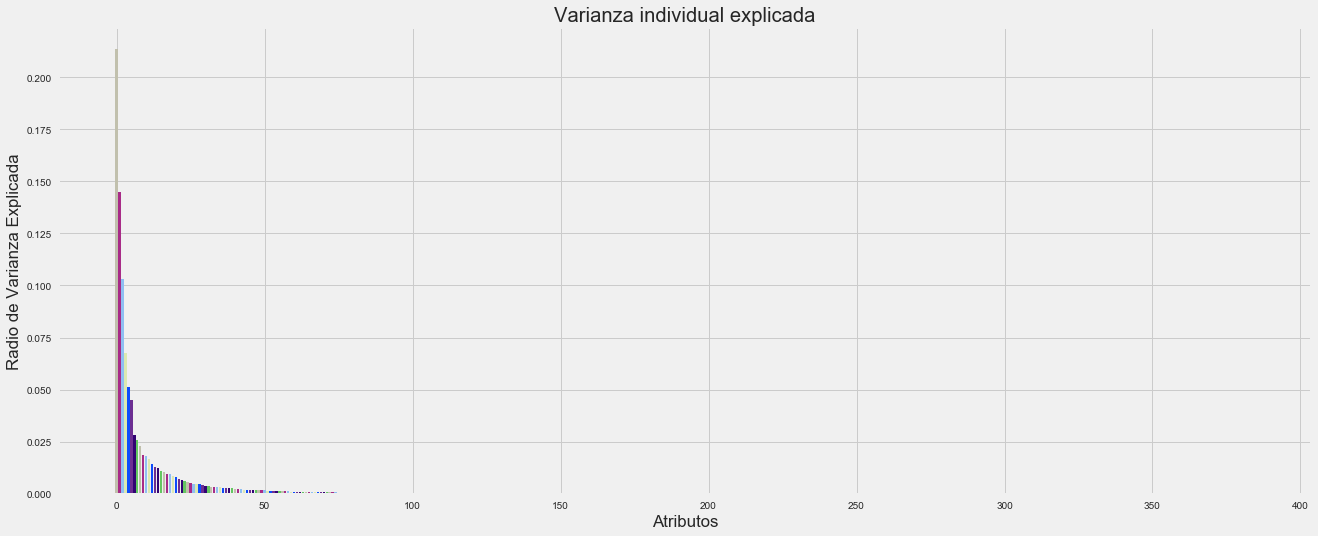

In [25]:
# Valores Propios, calculé la varianza explicada
total = sum(propiVal)
varExp = [(i / total) * 1 for i in sorted(propiVal, reverse = True)]
cumVarExp = np.cumsum(varExp)

# Varianza explicada por cada Valor Propio, y la acumulada
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(20, 8))    
    plt.xlabel("Atributos")
    plt.ylabel("Radio de Varianza Explicada")
    plt.title("Varianza individual explicada")
    plt.bar(range(numAttri1), np.real(varExp), align = "center", color = color1, ecolor = "black")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

--------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------------------------------------------------------------




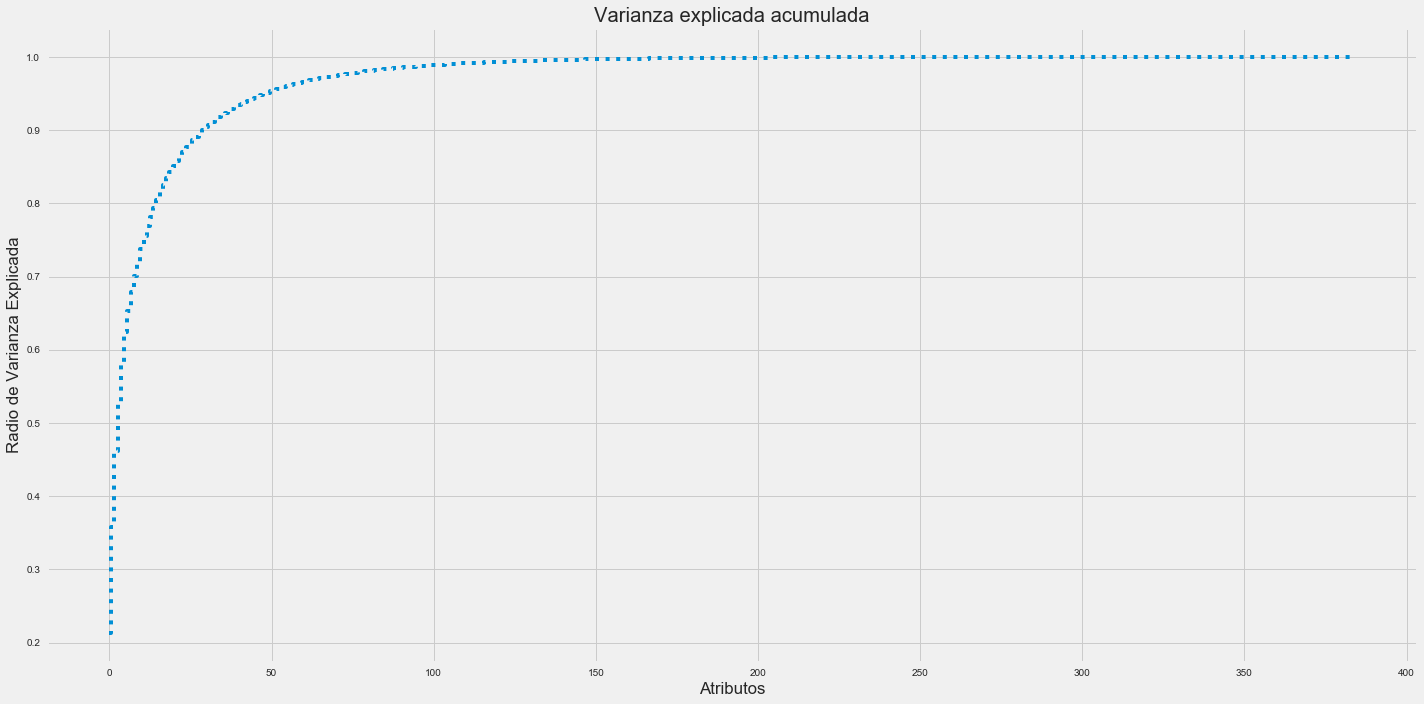

In [26]:
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
# Varianza explicada por cada Valor Propio, y la acumulada
total = sum(propiVal)
varExp = [(i / total) * 1 for i in sorted(propiVal, reverse = True)]
cum_var_exp = np.cumsum(varExp)

# Varianza explicada por cada autovalor, y la acumulada
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize = (20, 10))   
    
    plt.step(range(numAttri1), np.real(cum_var_exp), where = "mid", linestyle = ":")
    plt.ylabel("Radio de Varianza Explicada")
    plt.xlabel("Atributos")
    plt.title("Varianza explicada acumulada")
    plt.tight_layout()
    
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

# Datos Puros.


In [27]:
#Generé la matríz a partir de los pares Vector Propio y un Vector Propio
matriz_PCA = np.hstack((propiPares[0][1].reshape(numAttri1, 1),
                        propiPares[1][1].reshape(numAttri1, 1)
                       ))

Y = X_std.dot(matriz_PCA)
Y = np.real(Y)

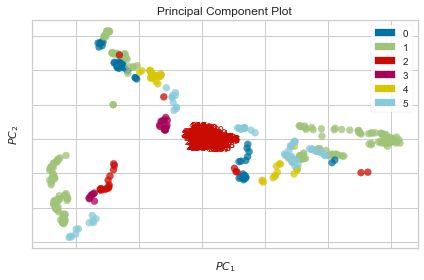

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [28]:
#Datos Puros* del Conjunto
visualizer = PCA(scale = True, proj_features = True)
visualizer.fit_transform(X, y)
visualizer.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

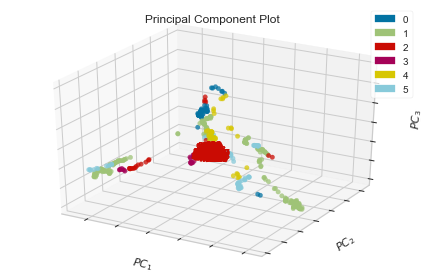

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [29]:
#Datos Puros* del Conjunto
visualizer = PCA(scale = True, proj_features = True, projection = 3)
visualizer.fit_transform(X, y)
visualizer.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

# Datos sobre un espacio de dimensionalidad 2.

In [30]:
#Asignar valores de los N componentes - Entrenamiento* 
pDf = pd.DataFrame(data = X_train
             , columns = ["Componente Principal 1", "Componente Principal 2"])
fDf = pd.concat([pDf, df2[[numAttri1]]], axis = 1)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




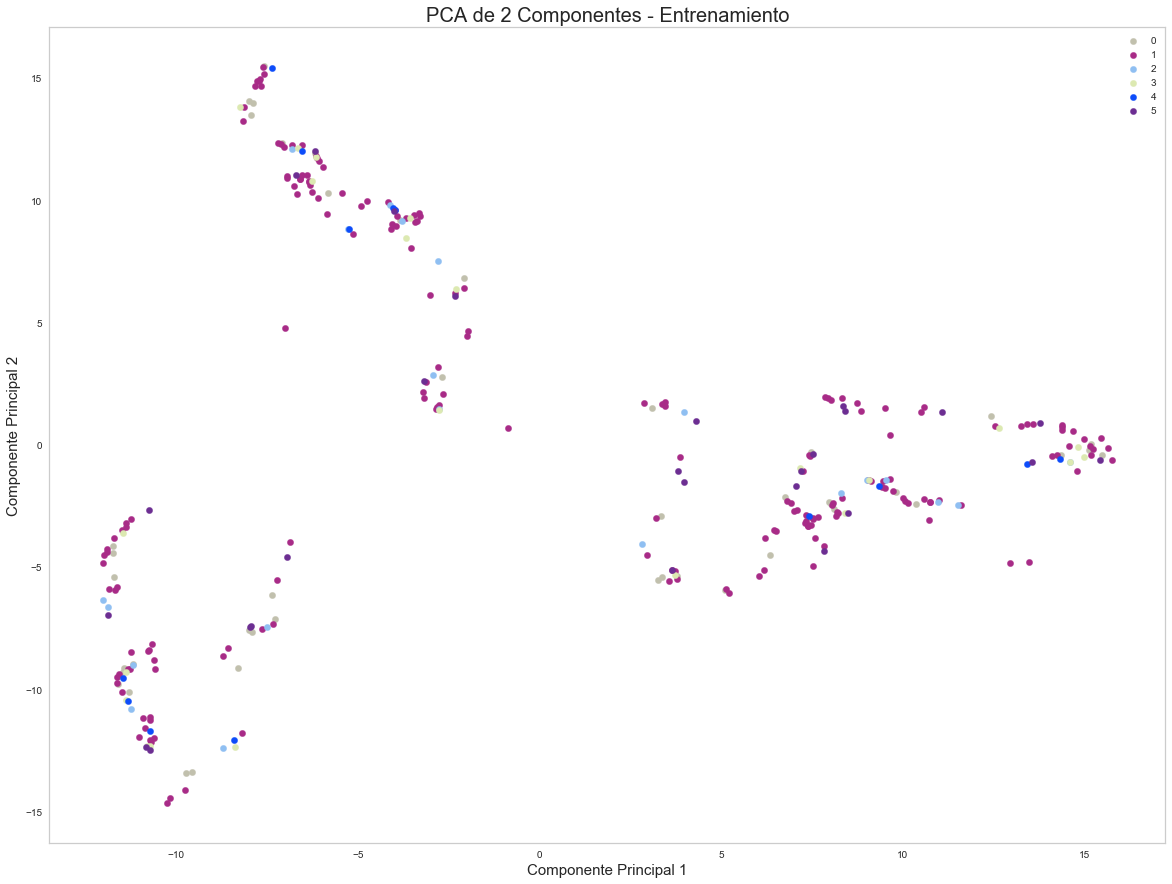

In [31]:
fig = plt.figure(figsize = (20,15))

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel("Componente Principal 1", fontsize = 15)
ax.set_ylabel("Componente Principal 2", fontsize = 15)
ax.set_title("PCA de {} Componentes - Entrenamiento".format(numComp), fontsize = 20)

targets = range(0, int(NumClas))

for target, color in zip(targets, color1):
    indicesToKeep = fDf[numAttri1] == target
    ax.scatter(fDf.loc[indicesToKeep, "Componente Principal 1"]
               , fDf.loc[indicesToKeep, "Componente Principal 2"]
               , c = color
               , s = 40)
    
ax.legend(targets)
ax.grid()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [32]:
#Asignar valores de los N componentes - Prueba* 
pDfT = pd.DataFrame(data = X_test
             , columns = ["Componente Principal 1", "Componente Principal 2"])
fDfT = pd.concat([pDfT, df2[[numAttri1]]], axis = 1)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




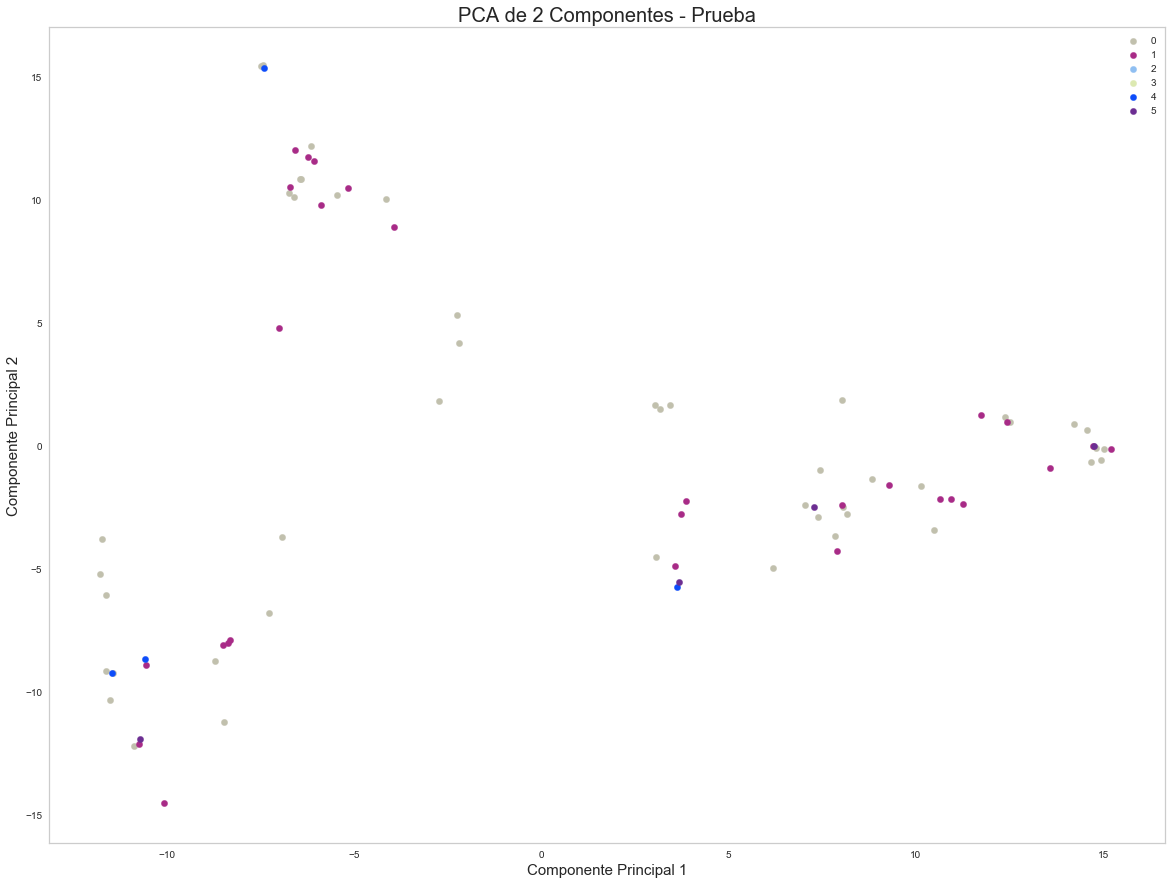

In [33]:
fig = plt.figure(figsize = (20,15))

ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel("Componente Principal 1", fontsize = 15)
ax.set_ylabel("Componente Principal 2", fontsize = 15)
ax.set_title("PCA de {} Componentes - Prueba".format(numComp), fontsize = 20)

targets = range(0, int(NumClas))

for target, color in zip(targets, color1):
    indicesToKeep = fDfT[numAttri1] == target
    ax.scatter(fDfT.loc[indicesToKeep, "Componente Principal 1"]
               , fDfT.loc[indicesToKeep, "Componente Principal 2"]
               , c = color
               , s = 40)
    
ax.legend(targets)
ax.grid()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [34]:
#FUNCIONES EXTRA

K-Medias


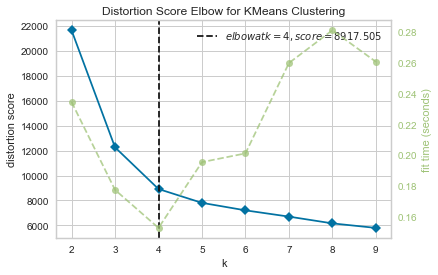

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [35]:
#Daros Puros* del Conjunto
print("K-Medias")
kelbow_visualizer(KMeans(random_state = 4), X, k = (2,10))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [36]:
print("Número de grupos")
numGr = input()
numGr = int(numGr)

Número de grupos


 6


Mapas de distancia intercluster


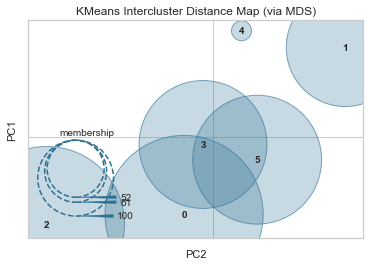

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [37]:
# Instanciar el modelo de agrupamiento y el visualizador
model = KMeans(numGr)
visualizer = InterclusterDistance(model)

print("Mapas de distancia intercluster")
visualizer.fit(X)        # Ajustar los datos al visualizador
visualizer.show()        # Finaliza y renderiza la figura
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [38]:
###gráfico donde se puedan observar las relaciones entre variables y sus histogramas
##
##sns.pairplot(df2)
##plt.show()
#HABILITAR si desea ver la relación

In [39]:
##sns.set(style="ticks")
##
##g = sns.pairplot(df2, corner = True)
#HABILITAR Para trazar múltiples distribuciones bivariadas por pares en un conjunto de datos

In [41]:
##g = sns.pairplot(df2, kind = "reg")
#HABILITAR Para trazar múltiples distribuciones bivariadas por pares en un conjunto de datos

# K Vecinos más Cercanos

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
print("\033[;32m"+"\n\n--------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("K Vecinos más Cercanos")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")



--------------------------------------------------------------------------------------------------------------------------------------------------------------------
K Vecinos más Cercanos
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [39]:
print("Número de vecinos a usar: ")
numV = input()
numV = int(numV)

Número de vecinos a usar: 


 6


In [40]:
#Algoritmo
kvc = KNeighborsClassifier(n_neighbors = numV, metric = "minkowski") #La métrica predeterminada es minkowski, y con p = 2 es equivalente a la métrica euclidiana estándar

In [41]:
print("Ingresa el número de pliegues: ")
pliegues = input()
pliegues = int(pliegues)

Ingresa el número de pliegues: 


 10


In [42]:
# Rendimiento
puntaje = cross_val_score(kvc, X, y, cv = pliegues, scoring = "accuracy")

In [43]:
#Lo Entreno
kvc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [44]:
#Predicción
y_pred = kvc.predict(X_test)
y_predE = kvc.predict(X_train)

In [45]:
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
predecir = cross_val_predict(kvc, X, y, cv = pliegues)
matriz = confusion_matrix(y, predecir)
print("Matriz de Confusión")
print(matriz)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

--------------------------------------------------------------------------------------------------------------------------------------------------------------------


Matriz de Confusión
[[ 48   1   0   0   0   2]
 [  4 194   0   0   0   0]
 [  4   1  14   0   1   1]
 [  0   0   0  21   0   1]
 [  0   0   0   0  39   3]
 [  0   0   0   0   9  66]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [46]:
predicciones = []
for f in  predecir:
    r = random.triangular(-.1, .1)
    r = round(r, 3)
    predicciones.append(f + r)

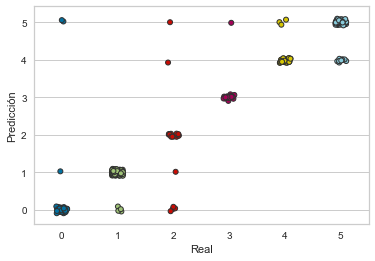

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [47]:
real = pd.DataFrame(data = y, columns = ["Real"])
clases = pd.DataFrame(data = y, columns = ["Clases"])
predecidas = pd.DataFrame(data = predicciones, columns = ["Predicción"])
matrix = pd.concat([real, predecidas, clases], axis = 1)

sb.stripplot(x = "Real", y = "Predicción", data = matrix, jitter = .1, linewidth = 1)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [48]:
df_confusion1 = pd.crosstab(y_test, y_pred)
df_confusion11 = pd.crosstab(y_train, y_predE)

In [49]:
df_confusion1 = pd.crosstab(y_test, y_pred, rownames = ["Prueba"], colnames = ["Predicción"], margins = True)
df_confusion11 = pd.crosstab(y_train, y_predE, rownames = ["Entrenamiento"], colnames = ["Predicción"], margins = True)

In [50]:
df_conf_norm = df_confusion1 / df_confusion1.sum(axis = 1)
df_conf_norm11 = df_confusion11 / df_confusion1.sum(axis = 1)

In [51]:
def plot_confusion_matrix(df_confusion1, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion1, cmap = cmap) # imshow

    plt.colorbar()
    tick_marks = np.arange(len(df_confusion1.columns))
    plt.xticks(tick_marks, df_confusion1.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion1.index)

    plt.ylabel(df_confusion1.index.name)
    plt.xlabel(df_confusion1.columns.name)
    
def plot_confusion_matrix1(df_confusion11, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion11, cmap = cmap) # imshow

    plt.colorbar()
    tick_marks = np.arange(len(df_confusion11.columns))
    plt.xticks(tick_marks, df_confusion11.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion11.index)

    plt.ylabel(df_confusion11.index.name)
    plt.xlabel(df_confusion11.columns.name)


--------------------------------------------------------------------------------------------------------------------------------------------------------------------




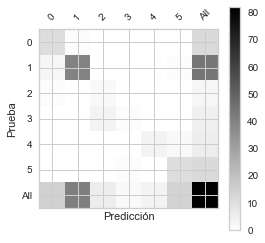

In [52]:
plot_confusion_matrix(df_confusion1)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [53]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizKV = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión - Prueba:")

print(matrizKV)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión - Prueba:
[[11  1  0  0  0  0]
 [ 3 40  0  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  0  4  1  0  0]
 [ 0  0  0  0  4  2]
 [ 0  0  0  1  0 11]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [54]:
#Precisión Prueba
preKVCP = format(kvc.score(X_test, y_test))
preKVCP = (float(preKVCP)*100)

print("Precisión K-Vecinos más Cercanos: ")
print("{0:.2f}".format(preKVCP) + "%")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión K-Vecinos más Cercanos: 
84.15%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




--------------------------------------------------------------------------------------------------------------------------------------------------------------------




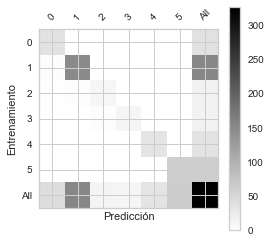

In [55]:
plot_confusion_matrix1(df_confusion11)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [56]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizKV = confusion_matrix(y_train, y_predE)
print("Matriz de Confusión - Entrenamiento:")

print(matrizKV)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión - Entrenamiento:
[[ 38   1   0   0   0   0]
 [  4 150   0   0   0   0]
 [  2   3  12   0   0   1]
 [  0   0   3  14   0   0]
 [  0   0   0   0  35   1]
 [  0   0   0   0   0  63]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [57]:
#Precisión Entrenamiento
preKVCE = format(kvc.score(X_test, y_test))
preKVCE = (float(preKVCE)*100)

print("Precisión K-Vecinos más Cercanos: ")
print("{0:.2f}".format(preKVCE) + "%")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión K-Vecinos más Cercanos: 
84.15%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




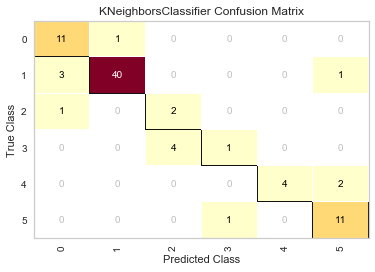

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [58]:
#Implementando Entrenamiento y Prueba
classes = range(0, int(NumClas))

cm = ConfusionMatrix(kvc, classes = classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

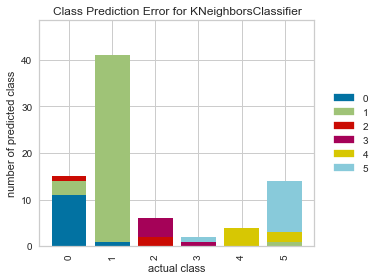

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [59]:
classes = range(0, int(NumClas))

# Instanciar el modelo de clasificación y el visualizador
visualizer = ClassPredictionError(
    kvc, classes = classes
)

# Ajustar los datos de entrenamiento al visualizador
visualizer.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
visualizer.score(X_test, y_test)

# Dibujar visualización
visualizer.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [60]:
#Validación Cruzada Prueba
print("Prueba")
precisionKVCP = sklearn.model_selection.cross_val_score(estimator = kvc,
                                            X = X_test, y = y_test,
                                            cv = 2, n_jobs = -1)

print("Precisiones: {}\n".format(precisionKVCP))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionKVCP),
                                          np.std(precisionKVCP)))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Prueba
Precisiones: [0.68292683 0.41463415]

Precisión promedio:  0.549 +/-  0.134
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [61]:
#Validación Cruzada Entrenamiento
print("Entrenamiento")
precisionKVCE = sklearn.model_selection.cross_val_score(estimator = kvc,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)

print("Precisiones: {}\n".format(precisionKVCE))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionKVCE),
                                          np.std(precisionKVCE)))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Entrenamiento
Precisiones: [0.93939394 0.93939394 0.87878788 0.87878788 0.84848485 0.90909091
 0.87878788 0.96875    0.9375     0.9375    ]

Precisión promedio:  0.912 +/-  0.037
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




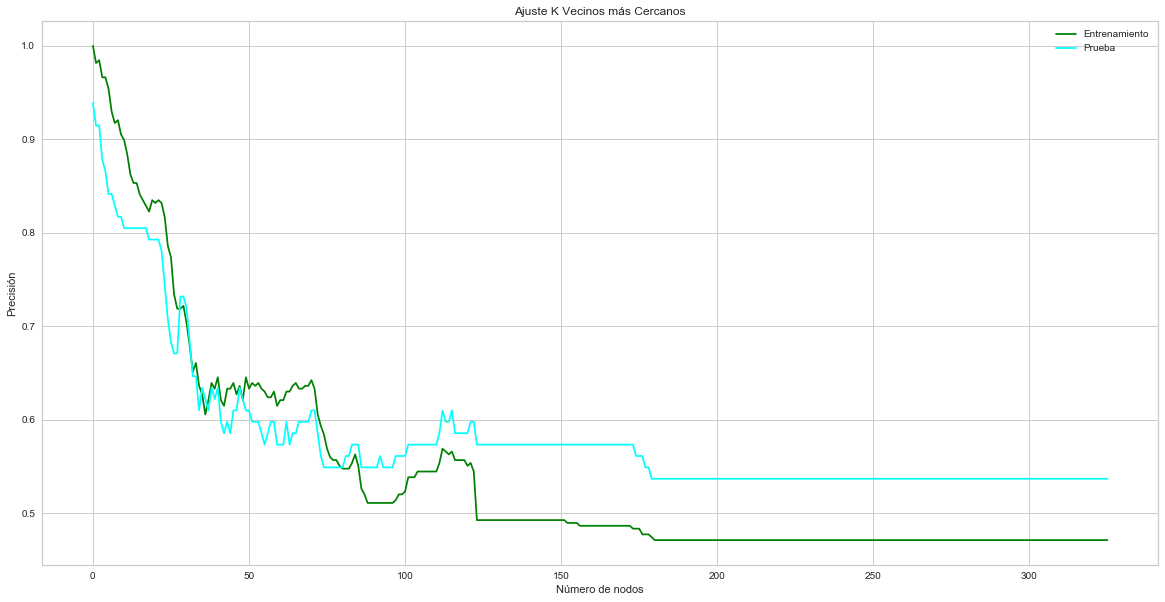

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [62]:
# Gráfico de ajuste de K Vecinos más Cercanos
numAttri2 = deTr
k_range = range(1, int(numAttri2))
#k_range = range(1, int(numAttri1))
#k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_prec.append(knn.score(X_train, y_train))
    eval_prec.append(knn.score(X_test, y_test))
    
# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(train_prec, color="green", label="Entrenamiento")
plt.plot(eval_prec, color="cyan", label="Prueba")
plt.title("Ajuste K Vecinos más Cercanos")
plt.legend()
plt.xlabel("Número de nodos")
plt.ylabel("Precisión")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

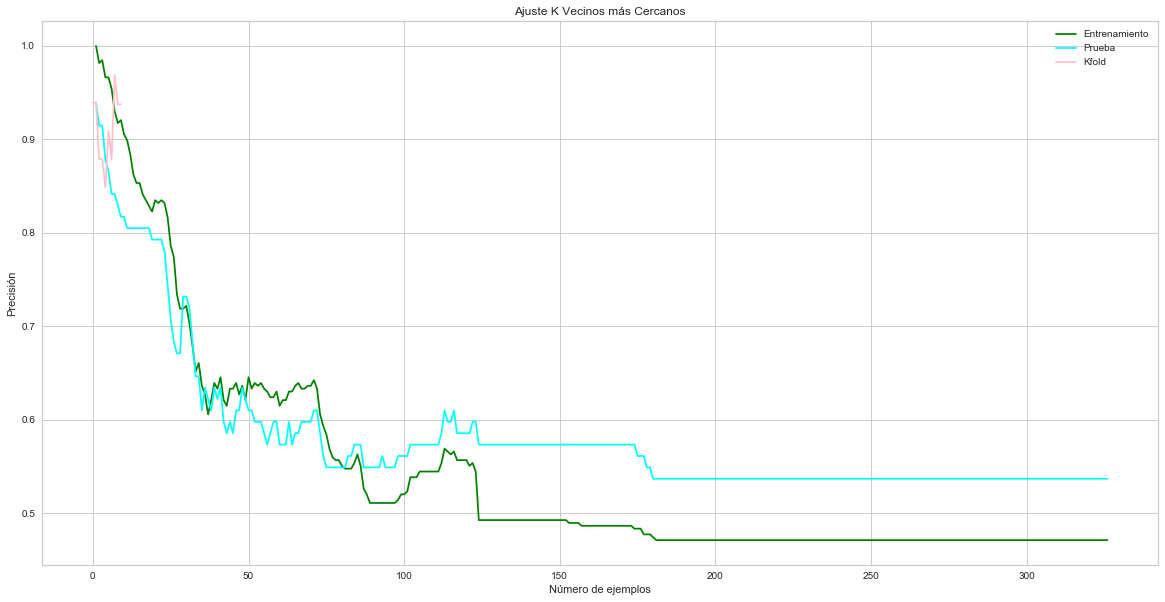

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [63]:
#Validación Cruzada Entrenamiento
precisionKVCE = sklearn.model_selection.cross_val_score(estimator = kvc,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)
# Grafico de ajuste de K Vecinos más Cercanos
k_range = range(1, int(numAttri2))
#k_range = range(1, int(numAttri1))
#k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_prec.append(knn.score(X_train, y_train))
    eval_prec.append(knn.score(X_test, y_test))
    
# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(k_range, train_prec, color = "green", label = "Entrenamiento")
plt.plot(k_range, eval_prec, color = "cyan", label = "Prueba")
plt.plot(precisionKVCE, color = "pink", label = "Kfold")

plt.title("Ajuste K Vecinos más Cercanos")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de ejemplos")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [64]:
#Precisión del modelo - Prueba
print("Precisión K Vecinos Más Cercanos - Prueba")
print(classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión K Vecinos Más Cercanos - Prueba
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.98      0.91      0.94        44
           2       0.33      0.67      0.44         3
           3       0.50      0.20      0.29         5
           4       1.00      0.67      0.80         6
           5       0.79      0.92      0.85        12

    accuracy                           0.84        82
   macro avg       0.72      0.71      0.69        82
weighted avg       0.86      0.84      0.84        82

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [65]:
#Precisión del modelo - Entrenamiento
print("Precisión K Vecinos Más Cercanos - Entrenamiento")
print(classification_report(y_train, y_predE))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión K Vecinos Más Cercanos - Entrenamiento
              precision    recall  f1-score   support

           0       0.86      0.97      0.92        39
           1       0.97      0.97      0.97       154
           2       0.80      0.67      0.73        18
           3       1.00      0.82      0.90        17
           4       1.00      0.97      0.99        36
           5       0.97      1.00      0.98        63

    accuracy                           0.95       327
   macro avg       0.93      0.90      0.92       327
weighted avg       0.95      0.95      0.95       327

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




--------------------------------------------------------------------------------------------------------------------------------------------------------------------




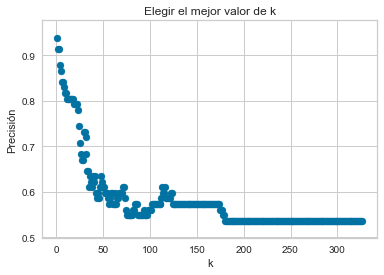

In [66]:
#Elegir el mejor valor de k
#k_range = range(1, numAttri1)
k_range = range(1, int(numAttri2))

scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.title("Elegir el mejor valor de k")
plt.xlabel("k")
plt.ylabel("Precisión")
plt.scatter(k_range, scores)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [67]:
# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator = kvc,
                        X = X, y = y, 
                        train_sizes = np.linspace(0.1, 1.0, 10), cv = pliegues,
                        n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)


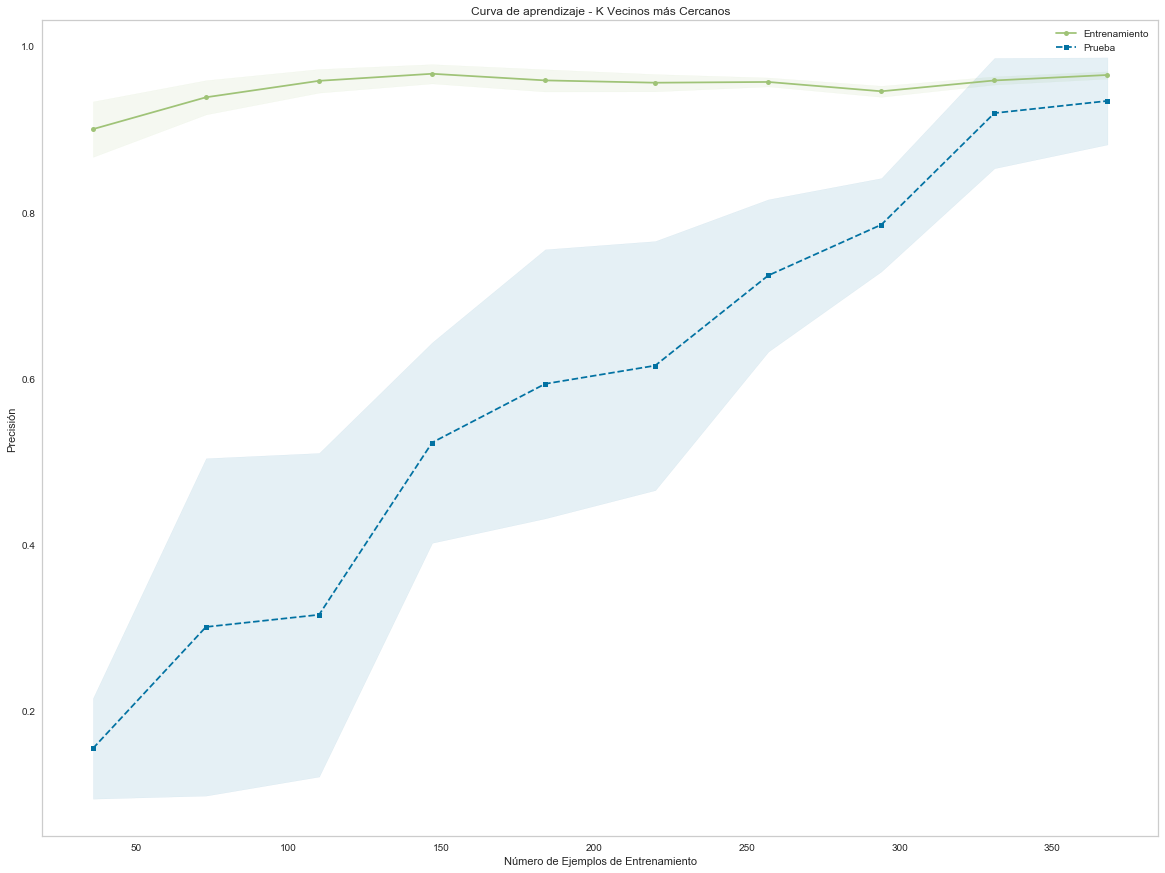

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [68]:
# Graficando las curvas
plt.subplots(figsize=(20, 15))

plt.plot(train_sizes, train_mean, color = "g", marker = "o", markersize = 5,
         label = "Entrenamiento")
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha = 0.1, color = "g")

plt.plot(train_sizes, test_mean, color = "b", linestyle = "--", 
         marker = "s", markersize = 5, label = "Prueba")
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha = 0.1, color = "b")

plt.grid()

plt.title("Curva de aprendizaje - K Vecinos más Cercanos")
plt.legend(loc = "best")
plt.xlabel("Número de Ejemplos de Entrenamiento")
plt.ylabel("Precisión")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [69]:
print("Promedio Total de Precisión de Vecinos más Cercanos:")
prom1 = float(np.mean(puntaje)*100)
print("{0:.2f}".format(prom1) + "%")
error1 = 100 - prom1
print("Protenjate de Error:")
print("{0:.2f}".format(error1) + "%")

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Promedio Total de Precisión de Vecinos más Cercanos:
93.40%
Protenjate de Error:
6.60%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [70]:
print("Número de Aciertos")
asi1 = (int(Elem)/100)*prom1
print("{0:.0f}".format(asi1))
fallos1 = (int(Elem)/100)*error1
print("Número de Fallos")
print("{0:.0f}".format(fallos1))

Número de Aciertos
382
Número de Fallos
27


# Navie Bayes

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

print("\033[;36m"+"\n\n--------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("Navie Bayes")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")



--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Navie Bayes
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [72]:
#Algoritmo
gnb = GaussianNB()

In [73]:
puntuación = cross_val_score(gnb, X, y, cv = pliegues, scoring = "accuracy")

In [74]:
#Lo Entreno
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
#Predicción
y_pred2 = gnb.predict(X_test)
y_pred22 = gnb.predict(X_train)

In [76]:
cvp = cross_val_predict(gnb, X, y, cv = pliegues)
matriz = confusion_matrix(y, cvp)
print("Matriz de Confusión")
print(matriz)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión
[[ 48   2   1   0   0   0]
 [ 23 175   0   0   0   0]
 [  1   3  17   0   0   0]
 [  2   6   0  12   0   2]
 [  1   1   0   0  40   0]
 [  2   3   5   0   6  59]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [77]:
predicciones = []
for f in  cvp:
    r = random.triangular(-.1, .1)
    r = round(r, 3)
    predicciones.append(f + r)

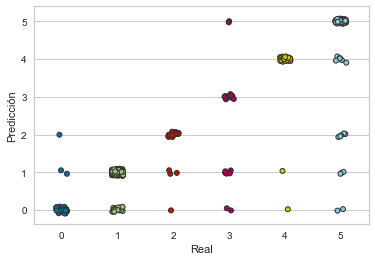

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [78]:
clas = pd.DataFrame(data = y, columns = ["Clases"])
real = pd.DataFrame(data = y, columns = ["Real"])
prede = pd.DataFrame(data = predicciones, columns = ["Predicción"])
concatenado = pd.concat([real, prede, clas], axis = 1)

sb.stripplot(x = "Real", y = "Predicción", data = concatenado, jitter = .1, linewidth = 1)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [79]:
df_confusion2 = pd.crosstab(y_test, y_pred2)
df_confusion22 = pd.crosstab(y_train, y_pred22)

In [80]:
df_confusion2 = pd.crosstab(y_test, y_pred2, rownames = ["Prueba"], colnames = ["Predicción"], margins = True)
df_confusion22 = pd.crosstab(y_train, y_pred22, rownames = ["Entrenamiento"], colnames = ["Predicción"], margins = True)

In [81]:
df_conf_norm2 = df_confusion2 / df_confusion2.sum(axis = 1)
df_conf_norm22 = df_confusion22 / df_confusion22.sum(axis = 1)

In [82]:
def plot_confusion_matrix(df_confusion2, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion2, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion2.columns))
    plt.xticks(tick_marks, df_confusion2.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion2.index)
    plt.ylabel(df_confusion2.index.name)
    plt.xlabel(df_confusion2.columns.name)

def plot_confusion_matrix2(df_confusion22, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion22, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion22.columns))
    plt.xticks(tick_marks, df_confusion22.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion22.index)
    plt.ylabel(df_confusion22.index.name)
    plt.xlabel(df_confusion22.columns.name)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




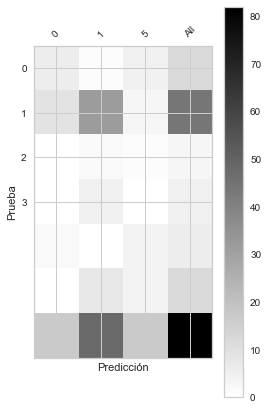

In [83]:
plot_confusion_matrix(df_confusion2)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [84]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizGNB = confusion_matrix(y_test, y_pred2)
print("Matriz de Confusión - Prueba:")
print(matrizGNB)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión - Prueba:
[[ 6  1  0  0  0  5]
 [ 9 32  0  0  0  3]
 [ 0  2  0  0  0  1]
 [ 0  5  0  0  0  0]
 [ 2  0  0  0  0  4]
 [ 0  8  0  0  0  4]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [85]:
#Precisión Prueba
preGNBP = format(gnb.score(X_test, y_test))
preGNBP = float(preGNBP)*100
print("Precisión Navie Bayes - Prueba: ")
print("{0:.2f}".format(preGNBP) + "%")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Navie Bayes - Prueba: 
51.22%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




--------------------------------------------------------------------------------------------------------------------------------------------------------------------




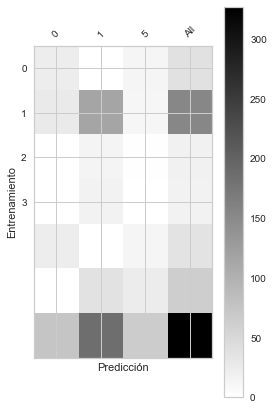

In [86]:
plot_confusion_matrix2(df_confusion22)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [87]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizGNB = confusion_matrix(y_train, y_pred22)
print("Matriz de Confusión - Entrenamiento:")

print(matrizGNB)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión - Entrenamiento:
[[ 24   1   0   0   0  14]
 [ 27 115   0   0   0  12]
 [  1  15   0   0   0   2]
 [  0  17   0   0   0   0]
 [ 23   0   0   0   0  13]
 [  0  38   0   0   0  25]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [88]:
#Precisión Entrenamiento
preGNBE = format(gnb.score(X_train, y_train))
preGNBE = float(preGNBE)*100

print("Precisión Navie Bayes - Entrenamiento: ")
print("{0:.2f}".format(preGNBE) + "%")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Navie Bayes - Entrenamiento: 
50.15%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




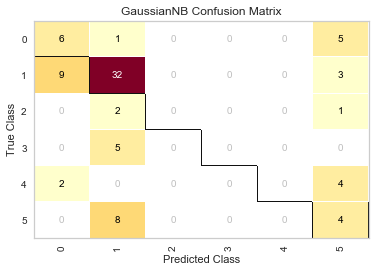

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [89]:
#Implementando Entrenamiento y Prueba
cm = ConfusionMatrix(gnb, classes = classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

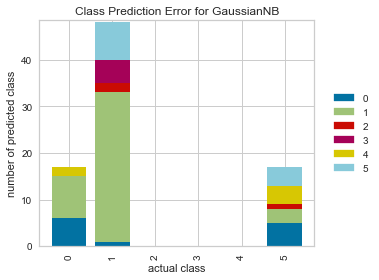

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [90]:
# Instanciar el modelo de clasificación y el visualizador
visualizer = ClassPredictionError(
    gnb, classes = classes
)

# Ajustar los datos de entrenamiento al visualizador
visualizer.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
visualizer.score(X_test, y_test)

# Dibujar visualización
visualizer.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [91]:
print("Validación Cruzada - Prueba")
precision = sklearn.model_selection.cross_val_score(estimator = gnb,
                                            X = X_test, y = y_test,
                                            cv = 2, n_jobs = -1)

print("Precisiones: {}\n".format(precision))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precision),
                                          np.std(precision)))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Validación Cruzada - Prueba
Precisiones: [0.53658537 0.51219512]

Precisión promedio:  0.524 +/-  0.012
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [92]:
print("Validación Cruzada - Entrenamiento")
precision = sklearn.model_selection.cross_val_score(estimator = gnb,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)

print("Precisiones: {}\n".format(precision))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precision),
                                          np.std(precision)))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Validación Cruzada - Entrenamiento
Precisiones: [0.3030303  0.45454545 0.54545455 0.57575758 0.45454545 0.48484848
 0.51515152 0.5        0.53125    0.53125   ]

Precisión promedio:  0.490 +/-  0.072
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




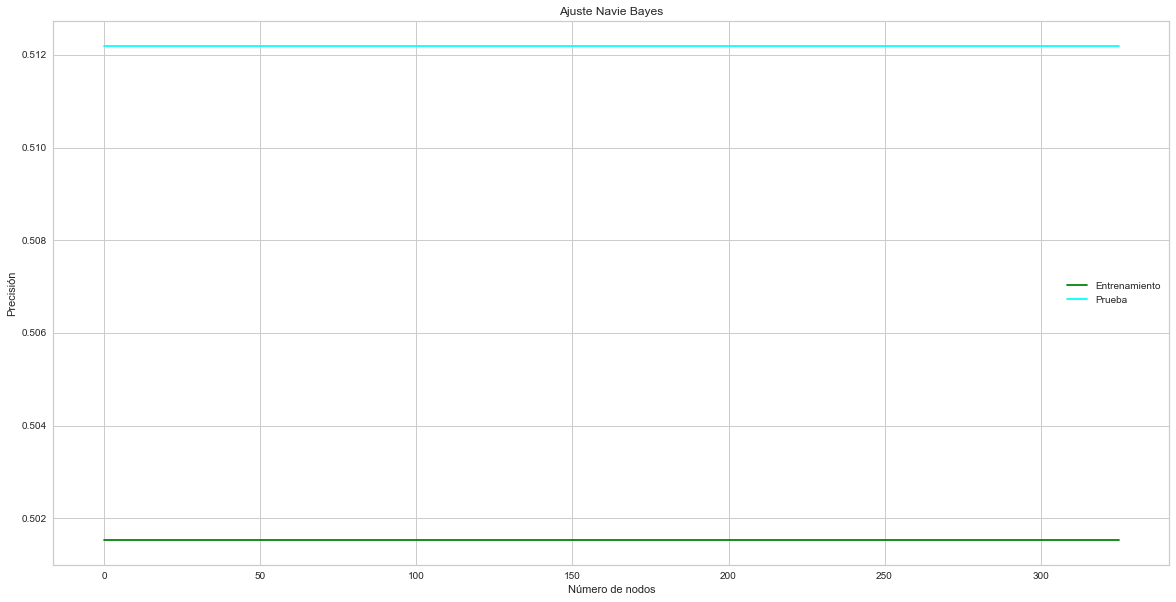

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [93]:
# Gráfico de ajuste de Navie Bayes
k_range = range(1, int(numAttri2))
#k_range = range(1, numAttri1)

eval_prec = []
train_prec = []
for k in k_range:
    train_prec.append(gnb.score(X_train, y_train))
    eval_prec.append(gnb.score(X_test, y_test))
    
# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(train_prec, color = "green", label = "Entrenamiento")
plt.plot(eval_prec, color = "cyan", label = "Prueba")
plt.title("Ajuste Navie Bayes")
plt.legend()
plt.xlabel("Número de nodos")
plt.ylabel("Precisión")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

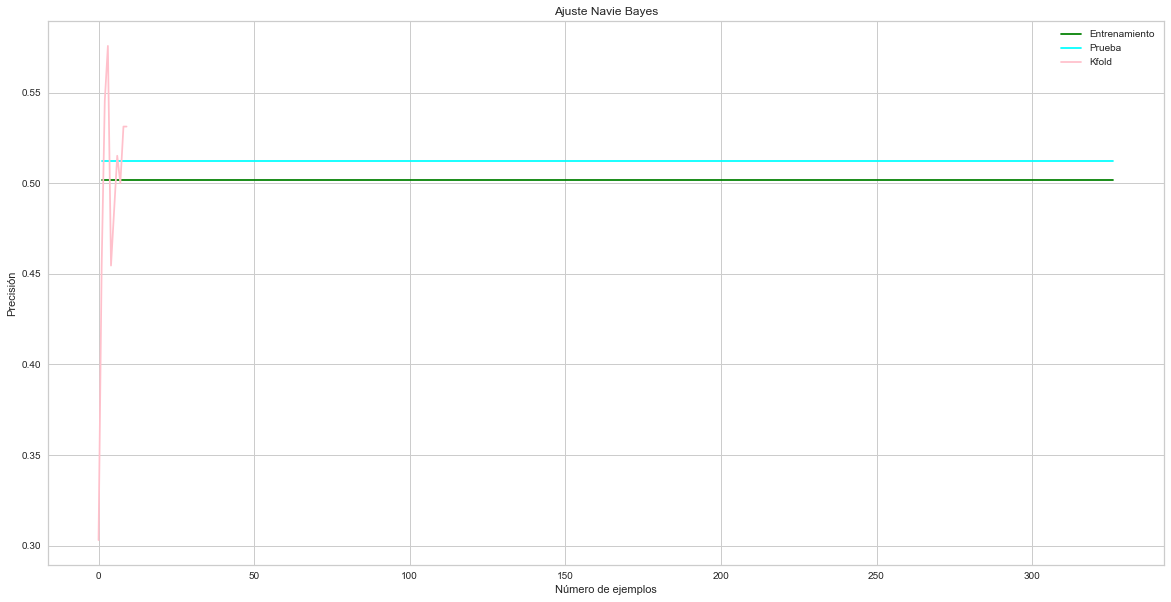

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [94]:
#Validación Cruzada Navie Bayes
precisionGNBE = sklearn.model_selection.cross_val_score(estimator = gnb,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)                                                        

# Grafico de ajuste de Navie Bayes
k_range = range(1, int(numAttri2))
#k_range = range(1, numAttri1)
eval_prec = []
train_prec = []
for k in k_range:
    train_prec.append(gnb.score(X_train, y_train))
    eval_prec.append(gnb.score(X_test, y_test))
    #precision((X_test, y_test))
# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(k_range, train_prec, color = "green", label = "Entrenamiento")
plt.plot(k_range, eval_prec, color = "cyan", label = "Prueba")
plt.plot(precisionGNBE, color = "pink", label = "Kfold")

plt.title("Ajuste Navie Bayes")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de ejemplos")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [95]:
#Precisión del modelo - Prueba
warnings.filterwarnings('ignore')
print("Precisión Navie Bayes - Prueba")
print(classification_report(y_test, y_pred2))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Navie Bayes - Prueba
              precision    recall  f1-score   support

           0       0.35      0.50      0.41        12
           1       0.67      0.73      0.70        44
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         6
           5       0.24      0.33      0.28        12

    accuracy                           0.51        82
   macro avg       0.21      0.26      0.23        82
weighted avg       0.44      0.51      0.47        82

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [96]:
#Precisión del modelo - Entrenamiento
print("Precisión Navie Bayes - Entrenamiento")
print(classification_report(y_train, y_pred22))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Navie Bayes - Entrenamiento
              precision    recall  f1-score   support

           0       0.32      0.62      0.42        39
           1       0.62      0.75      0.68       154
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00        36
           5       0.38      0.40      0.39        63

    accuracy                           0.50       327
   macro avg       0.22      0.29      0.25       327
weighted avg       0.40      0.50      0.44       327

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [97]:
# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator = gnb,
                        X = X, y = y, 
                        train_sizes = np.linspace(0.1, 1.0, 10), cv = pliegues,
                        n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

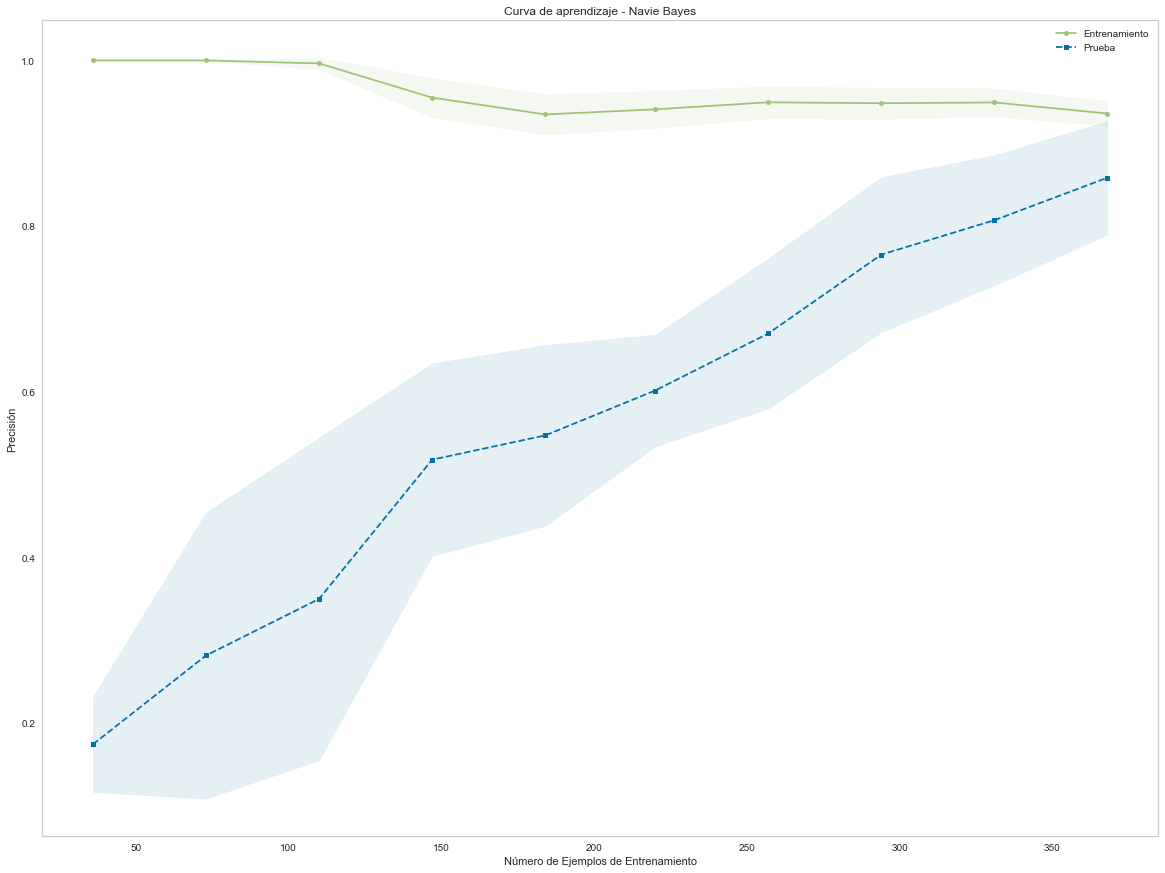

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [98]:
# Graficando las curvas
plt.subplots(figsize=(20, 15))

plt.plot(train_sizes, train_mean, color = "g", marker = "o", markersize = 5,
         label = "Entrenamiento")
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha = 0.1, color = "g")

plt.plot(train_sizes, test_mean, color = "b", linestyle = "--", 
         marker = "s", markersize = 5, label = "Prueba")
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha = 0.1, color = "b")

plt.grid()

plt.title("Curva de aprendizaje - Navie Bayes")
plt.legend(loc = "best")
plt.xlabel("Número de Ejemplos de Entrenamiento")
plt.ylabel("Precisión")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [99]:
print("Promedio Total de Precisión de Navie Bayes:")
prom2 = float(np.mean(puntuación)*100)
print("{0:.2f}".format(prom2) + "%")
error2 = 100 - prom2
print("Protenjate de Error:")
print("{0:.2f}".format(error2) + "%")

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Promedio Total de Precisión de Navie Bayes:
85.84%
Protenjate de Error:
14.16%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [100]:
print("Número de Aciertos")
asi2 = (int(Elem)/100)*prom2
print("{0:.0f}".format(asi2))
fallos2 = (int(Elem)/100)*error2
print("Número de Fallos")
print("{0:.0f}".format(fallos2))

Número de Aciertos
351
Número de Fallos
58


# Árboles de Decisión Clasificación

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn import tree

print("\033[;31m"+"\n\n--------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("Árbol de Decisión Clasificación")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")



--------------------------------------------------------------------------------------------------------------------------------------------------------------------
Árbol de Decisión Clasificación
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [102]:
print("Ingresa la profundidad máxima del árbol: ")
prof = input()
prof = int(prof)
#5

Ingresa la profundidad máxima del árbol: 


 6


In [103]:
print("Ingresa la función para medir la calidad de una división. Los criterios admitidos son 'gini' y 'entropy'.")
criterio = input()
#entropy
#gini

Ingresa la función para medir la calidad de una división. Los criterios admitidos son 'gini' y 'entropy'.


 entropy


In [104]:
#Algoritmo
ad = DecisionTreeClassifier(criterion = criterio, max_depth = prof)#Profundidad

In [105]:
#Rendimiento
puntaje3 = cross_val_score(ad, X, y, cv = pliegues, scoring = "accuracy")

In [106]:
#Lo Entreno
ad.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:
#Predicción
y_pred3 = ad.predict(X_test)
y_pred33 = ad.predict(X_train)

In [108]:
predecir = cross_val_predict(ad, X, y, cv = pliegues)
matriz = confusion_matrix(y, predecir)
print("Matriz de Confusión")
print(matriz)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión
[[ 50   0   1   0   0   0]
 [  0 191   2   3   1   1]
 [  0   0  19   0   2   0]
 [  0   1   0  19   0   2]
 [  1   0   0   0  36   5]
 [  0   8   4   0   1  62]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [109]:
predicciones = []
for f in  predecir:
    r= random.triangular(-.1, .1)
    r = round(r, 3)
    predicciones.append(f + r)

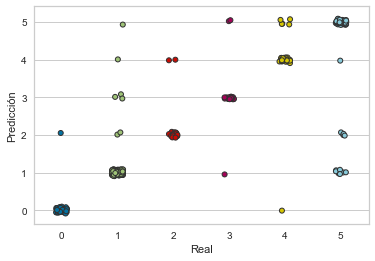

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [110]:
real = pd.DataFrame(data = y, columns = ["Real"])
clases = pd.DataFrame(data = y, columns = ["Clases"])
predecidas = pd.DataFrame(data = predicciones, columns = ["Predicción"])
matrix = pd.concat([real, predecidas, clases], axis = 1)

sb.stripplot(x = "Real", y = "Predicción", data = matrix, jitter = .1, linewidth = 1)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [111]:
df_confusion3 = pd.crosstab(y_test, y_pred3)
df_confusion33 = pd.crosstab(y_train, y_pred33)

In [112]:
df_confusion3 = pd.crosstab(y_test, y_pred3, rownames = ["Prueba"], colnames = ["Predicción"], margins = True)
df_confusion33 = pd.crosstab(y_train, y_pred33, rownames = ["Entrenamiento"], colnames = ["Predicción"], margins = True)

In [113]:
df_conf_norm3 = df_confusion3 / df_confusion3.sum(axis = 1)
df_conf_norm33 = df_confusion33 / df_confusion33.sum(axis = 1)

In [114]:
def plot_confusion_matrix(df_confusion3, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion3, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion3.columns))
    plt.xticks(tick_marks, df_confusion3.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion3.index)
    plt.ylabel(df_confusion3.index.name)
    plt.xlabel(df_confusion3.columns.name)
    
def plot_confusion_matrix3(df_confusion33, title = "Matriz de Confusión", cmap = plt.cm.gray_r):
    plt.matshow(df_confusion33, cmap = cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion33.columns))
    plt.xticks(tick_marks, df_confusion33.columns, rotation = 45)
    plt.yticks(tick_marks, df_confusion33.index)
    plt.ylabel(df_confusion33.index.name)
    plt.xlabel(df_confusion33.columns.name)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




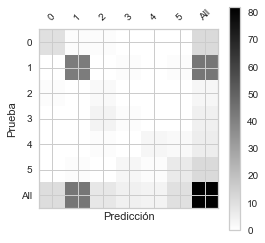

In [115]:
plot_confusion_matrix(df_confusion3)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [116]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó
matrizAD = confusion_matrix(y_test, y_pred3)
print("Matriz de Confusión - Prueba:")
print(matrizAD)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión - Prueba:
[[10  1  1  0  0  0]
 [ 0 42  0  1  0  1]
 [ 1  0  2  0  0  0]
 [ 0  0  4  1  0  0]
 [ 0  0  1  0  3  2]
 [ 0  1  0  3  1  7]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [117]:
#Precisión Prueba
preADP = precision_score(y_test, y_pred, average = "weighted")#Ponderado
preADP = float(preADP)*100
print("Precisión Árbol de Decisión:")
print("{0:.2f}".format(preADP) + "%")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Árbol de Decisión:
86.17%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




--------------------------------------------------------------------------------------------------------------------------------------------------------------------




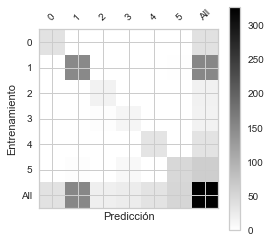

In [118]:
plot_confusion_matrix3(df_confusion33)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [119]:
#Matriz de Confusión, para ver que tan bien o mal se clasificó 
matrizAD = confusion_matrix(y_train, y_pred33)
print("Matriz de Confusión - Entrenamiento:")
print(matrizAD)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión - Entrenamiento:
[[ 38   0   1   0   0   0]
 [  0 151   0   1   0   2]
 [  0   0  17   1   0   0]
 [  0   0   3  14   0   0]
 [  0   0   0   0  35   1]
 [  0   3   0   9   1  50]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




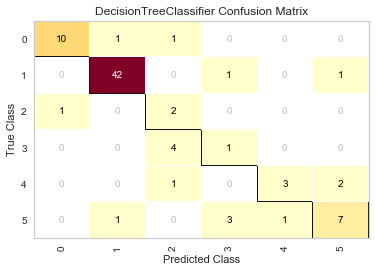

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [120]:
#Implementando Entrenamiento y Prueba
cm = ConfusionMatrix(ad, classes = classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)

cm.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

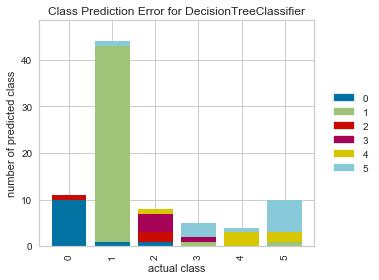

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [121]:
# Instanciar el modelo de clasificación y el visualizador
visualizer = ClassPredictionError(
    ad, classes = classes
)

# Ajustar los datos de entrenamiento al visualizador
visualizer.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
visualizer.score(X_test, y_test)

# Dibujar visualización
visualizer.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [122]:
#Validación Cruzada Prueba
precisionADP = sklearn.model_selection.cross_val_score(estimator = ad,
                                            X = X_test, y = y_test,
                                            cv = 2, n_jobs = -1)

print("Prueba: ")
print("Precisiones: {}\n".format(precisionADP))
print("Precisión promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionADP),
                                          np.std(precisionADP)))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Prueba: 
Precisiones: [0.7804878  0.68292683]

Precisión promedio:  0.732 +/-  0.049
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [123]:
#Validación Cruzada Entrenamiento
precisionADE = sklearn.model_selection.cross_val_score(estimator = ad,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)

print("Entrenamiento")
print("Precisiones: {}\n".format(precisionADE))
print("Precision promedio: {0: .3f} +/- {1: .3f}".format(np.mean(precisionADE),
                                          np.std(precisionADE)))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Entrenamiento
Precisiones: [0.87878788 0.87878788 0.87878788 0.75757576 0.87878788 0.84848485
 0.78787879 0.96875    0.90625    1.        ]

Precision promedio:  0.878 +/-  0.069
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




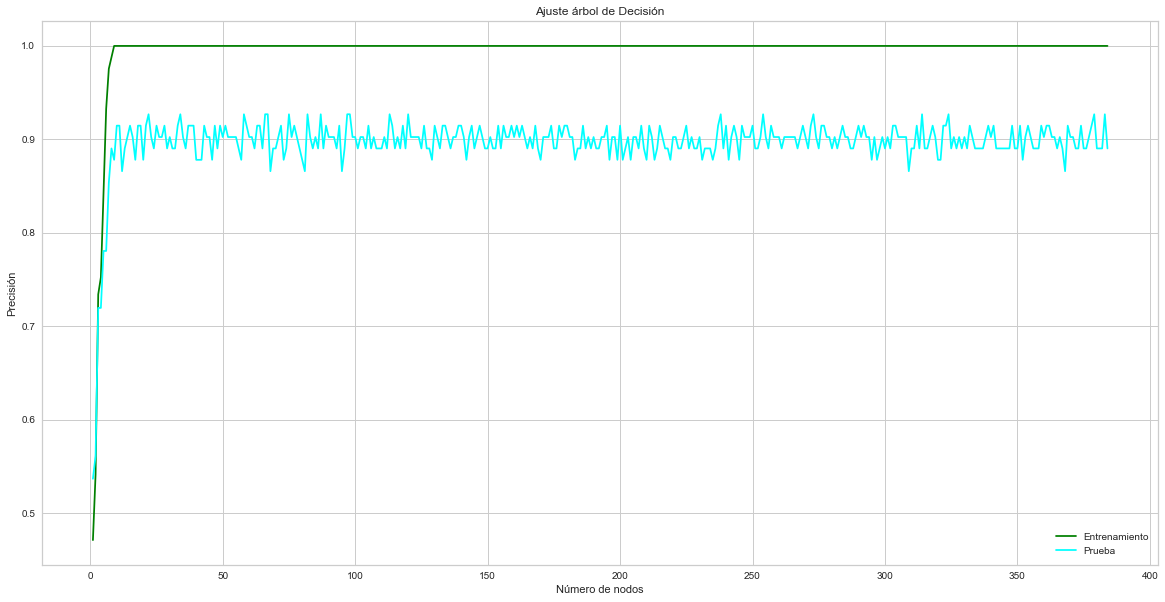

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [124]:
# Gráfico de ajuste del Árbol de Decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, numAttri1))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion = criterio, max_depth = deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(max_deep_list, train_prec, color = "green", label = "Entrenamiento")
plt.plot(max_deep_list, eval_prec, color = "cyan", label = "Prueba")
plt.title("Ajuste árbol de Decisión")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de nodos")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

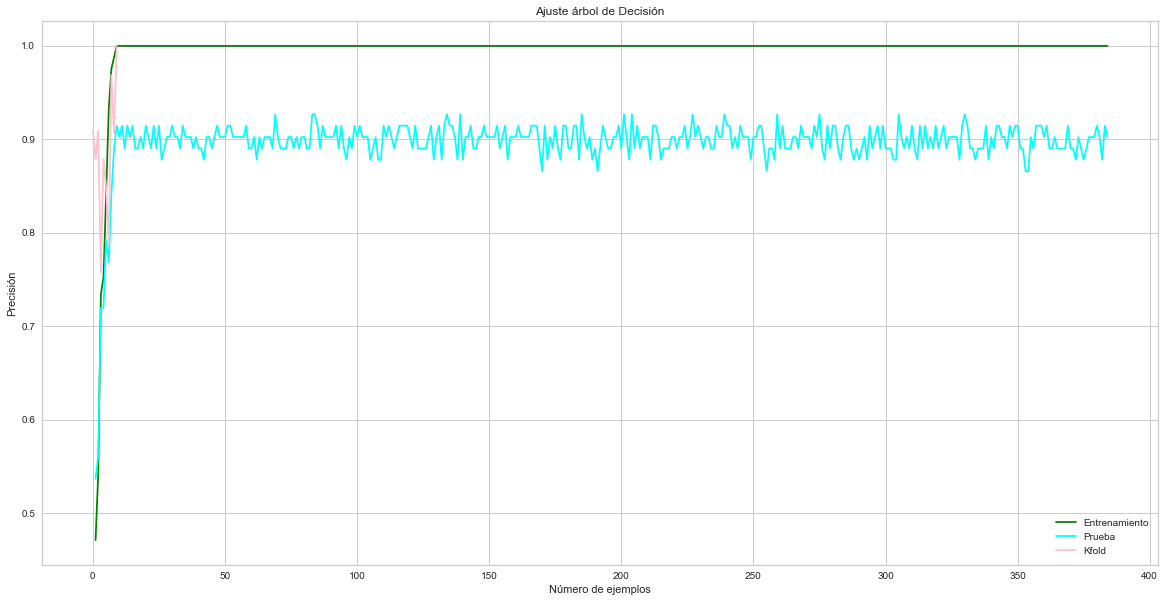

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [125]:
#Validación Cruzada 
precisionADP = sklearn.model_selection.cross_val_score(estimator = ad,
                                            X = X_train, y = y_train,
                                            cv = pliegues, n_jobs = -1)

# Gráfico de ajuste del Árbol de Decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, numAttri1))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion  = criterio, max_depth = deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# Resultados.
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(max_deep_list, train_prec, color = "green", label = "Entrenamiento")
plt.plot(max_deep_list, eval_prec, color = "cyan", label = "Prueba")
plt.plot(precisionADP, color = "pink", label = "Kfold")

plt.title("Ajuste árbol de Decisión")
plt.legend()
plt.ylabel("Precisión")
plt.xlabel("Número de ejemplos")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [126]:
print("Precisión Árbol de Decisión - Prueba")
print(classification_report(y_test, y_pred3))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Árbol de Decisión - Prueba
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.95      0.95      0.95        44
           2       0.25      0.67      0.36         3
           3       0.20      0.20      0.20         5
           4       0.75      0.50      0.60         6
           5       0.70      0.58      0.64        12

    accuracy                           0.79        82
   macro avg       0.63      0.62      0.60        82
weighted avg       0.82      0.79      0.80        82

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [127]:
print("Precisión Árbol de Decisión - Entrenamiento")
print(classification_report(y_train, y_pred33))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Precisión Árbol de Decisión - Entrenamiento
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.98      0.98      0.98       154
           2       0.81      0.94      0.87        18
           3       0.56      0.82      0.67        17
           4       0.97      0.97      0.97        36
           5       0.94      0.79      0.86        63

    accuracy                           0.93       327
   macro avg       0.88      0.91      0.89       327
weighted avg       0.94      0.93      0.94       327

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [128]:
# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(estimator = ad,
                        X = X, y = y, 
                        train_sizes = np.linspace(0.1, 1.0, 10), cv = pliegues,
                        n_jobs = -1)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

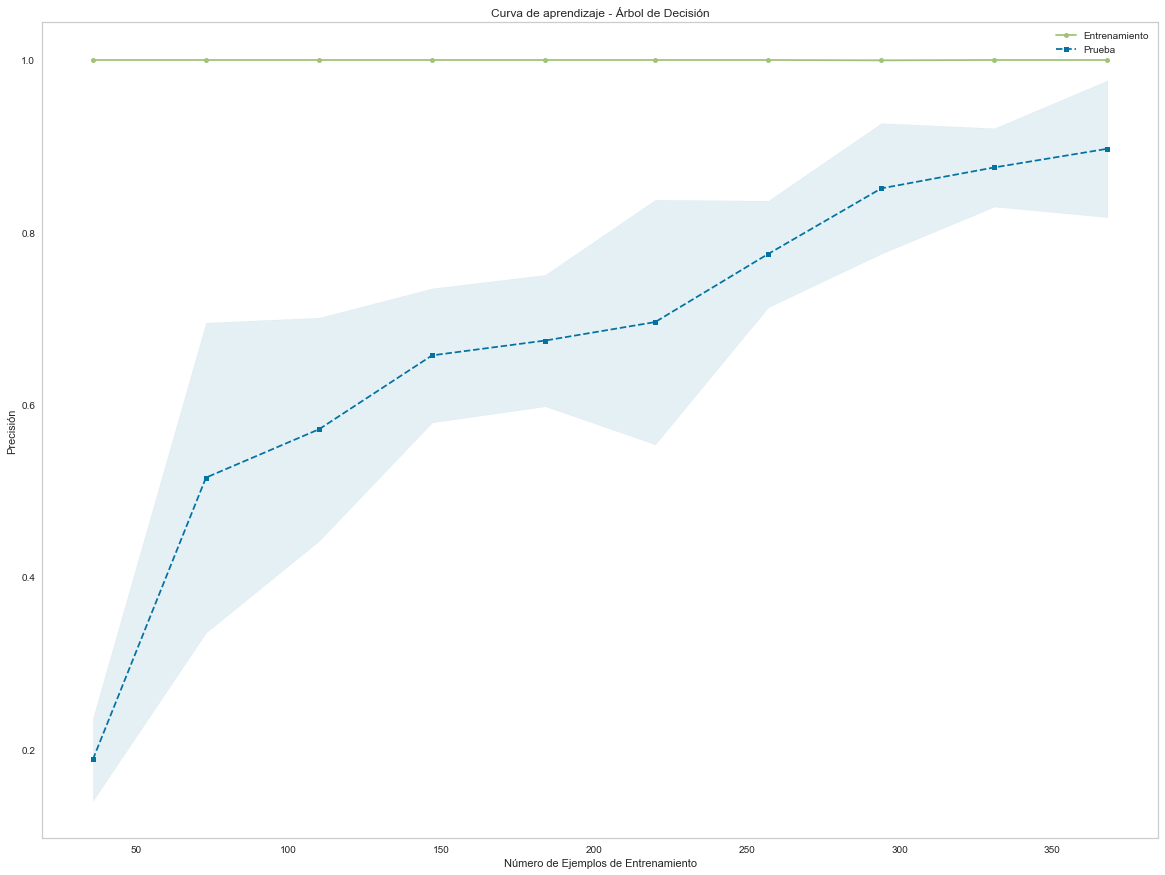

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [129]:
# Graficando las curvas
plt.subplots(figsize=(20, 15))

plt.plot(train_sizes, train_mean, color = "g", marker = "o", markersize = 5,
         label = "Entrenamiento")
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha = 0.1, color='g')

plt.plot(train_sizes, test_mean, color = "b", linestyle = "--", 
         marker = "s", markersize = 5, label = "Prueba")
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha = 0.1, color = "b")

plt.grid()

plt.title("Curva de aprendizaje - Árbol de Decisión")
plt.legend(loc = "best")
plt.xlabel("Número de Ejemplos de Entrenamiento")
plt.ylabel("Precisión")
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [130]:
print("Profundidad del Árbol")
ad.tree_.max_depth


Profundidad del Árbol


6

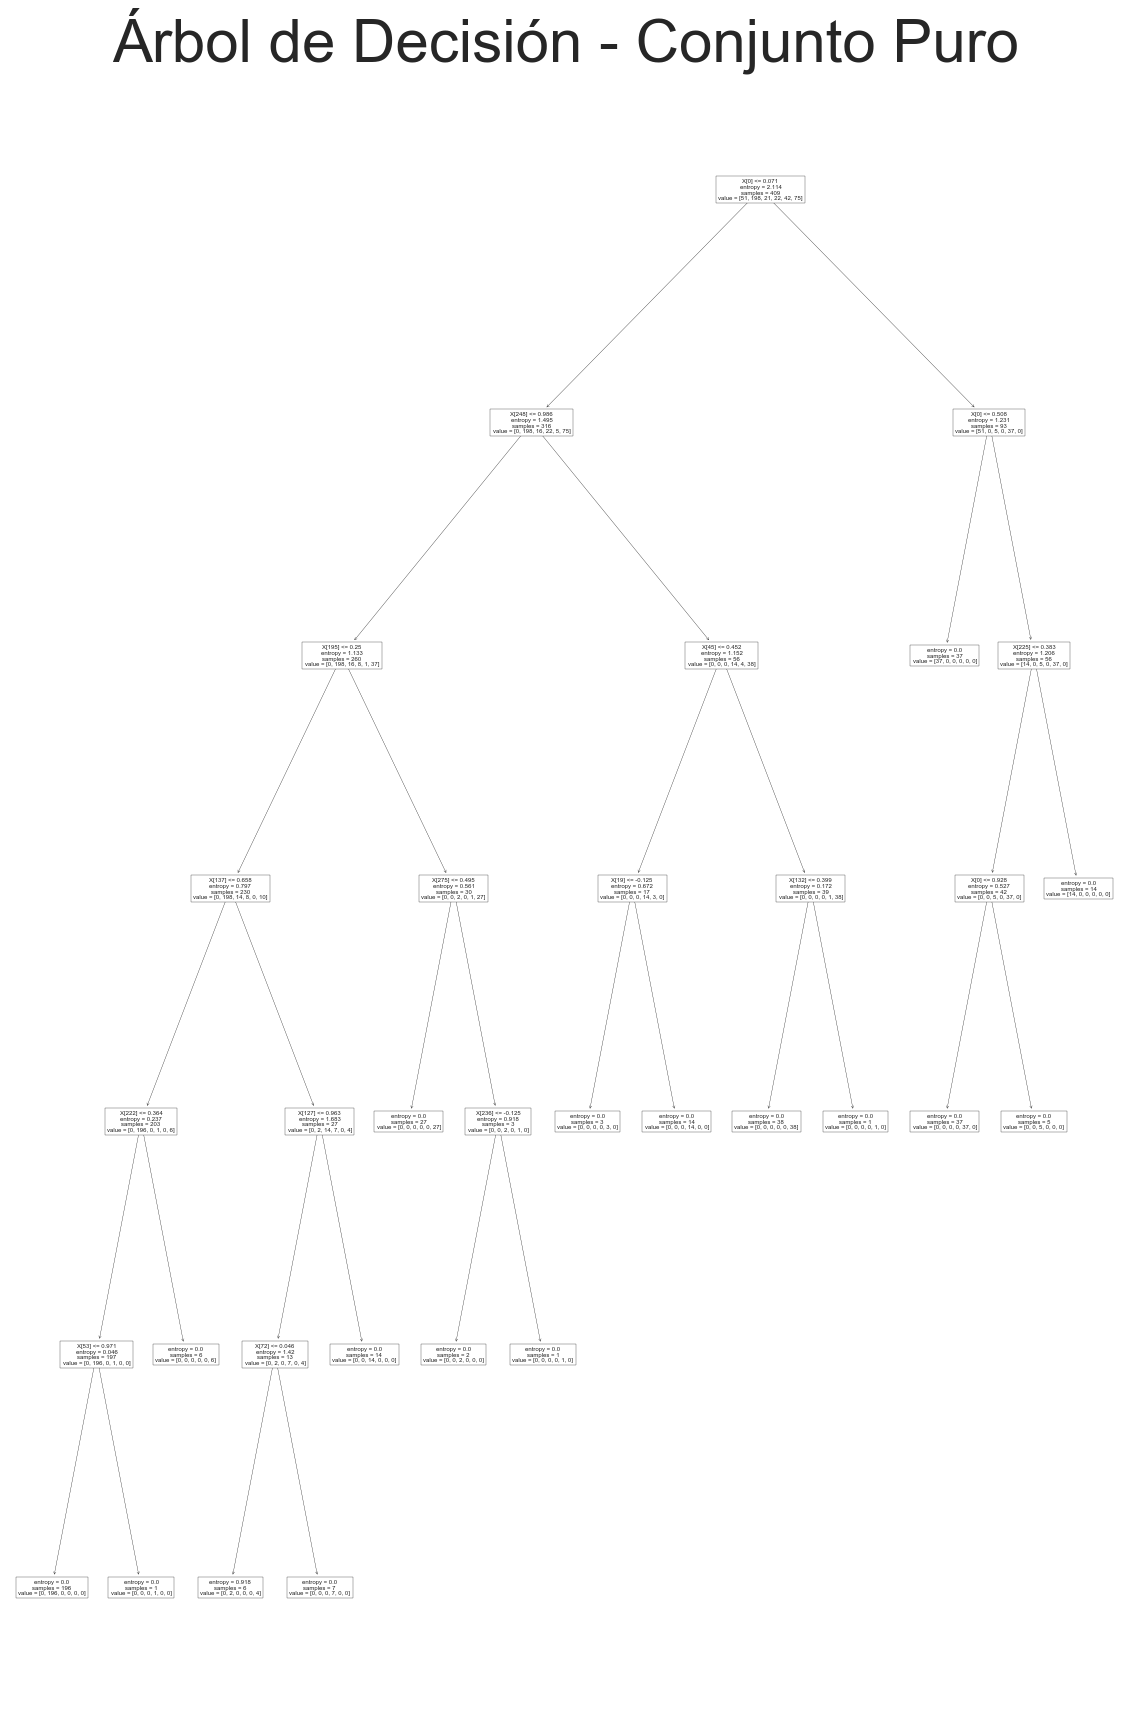

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [131]:
fig, ax = plt.subplots(figsize=(20, 30))

tree.plot_tree(ad.fit(X, y)) 
plt.title("Árbol de Decisión - Conjunto Puro", fontsize = 60)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

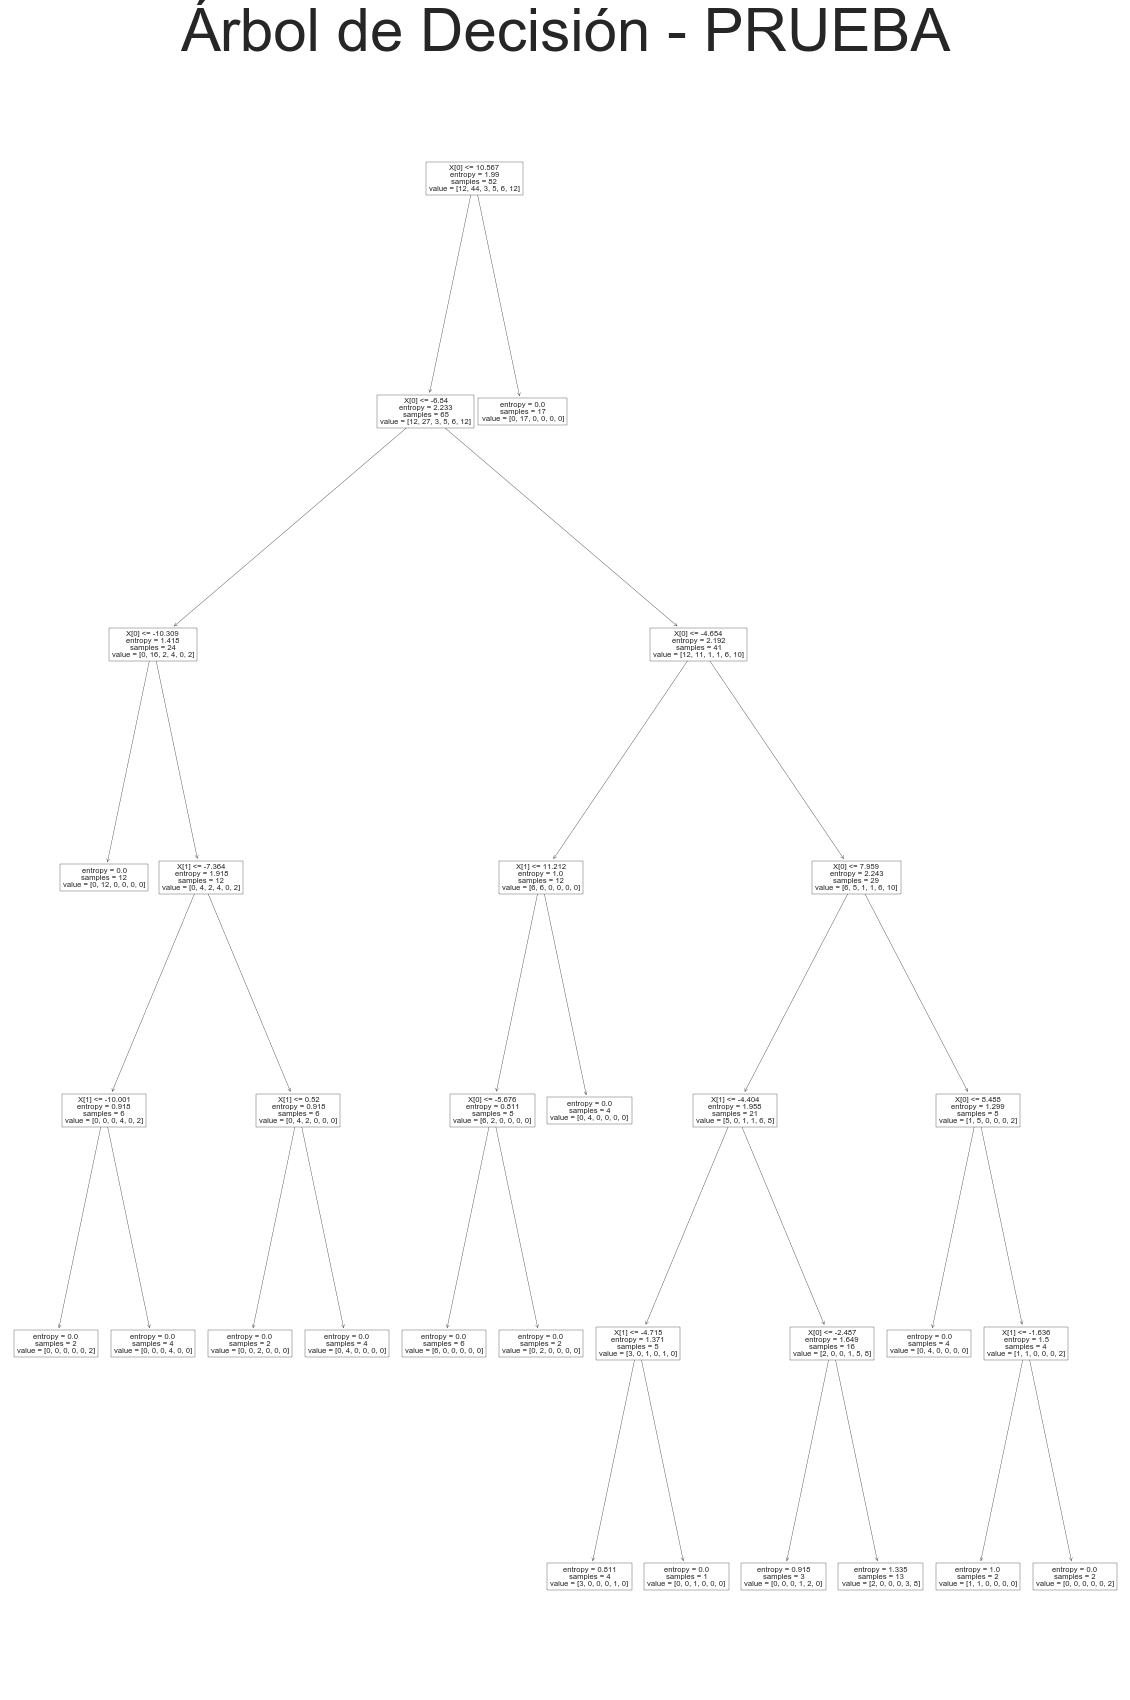

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [132]:
fig, ax = plt.subplots(figsize=(20, 30))

tree.plot_tree(ad.fit(X_test, y_test)) 
plt.title("Árbol de Decisión - PRUEBA", fontsize =60)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

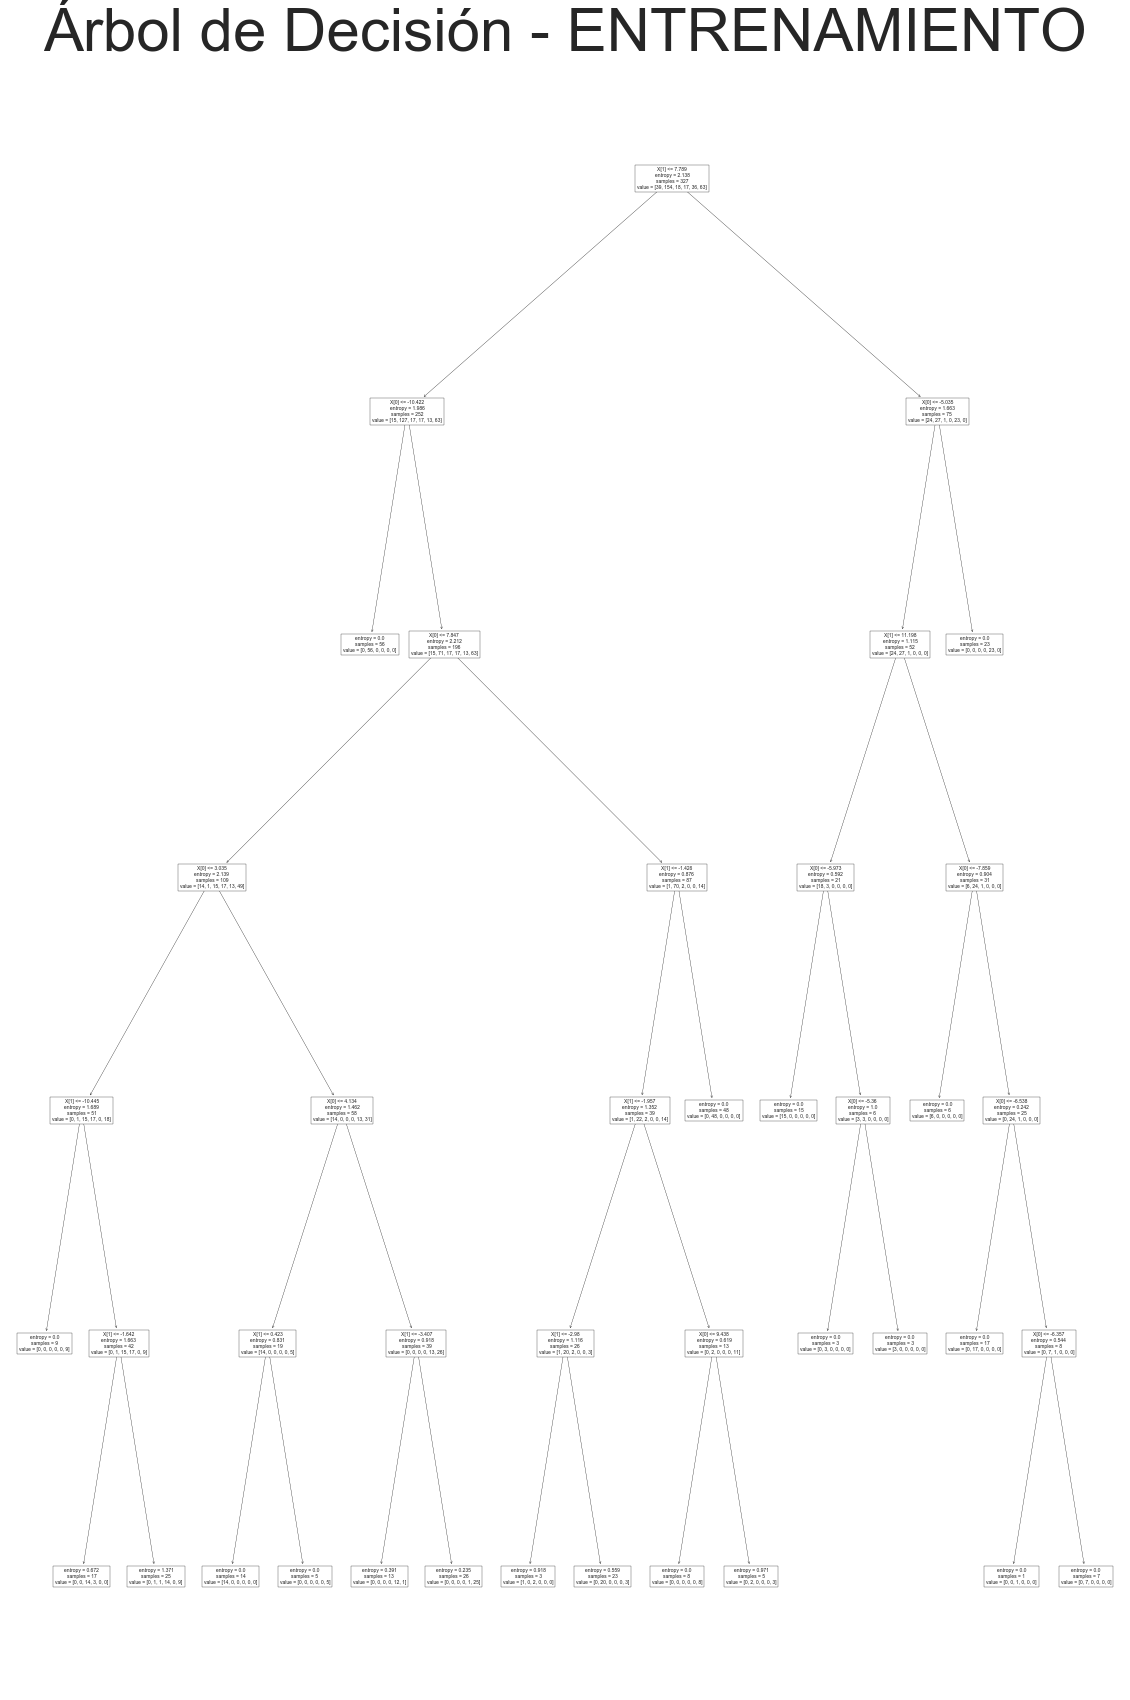

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [133]:
fig, ax = plt.subplots(figsize=(20, 30))

tree.plot_tree(ad.fit(X_train, y_train)) 
plt.title("Árbol de Decisión - ENTRENAMIENTO", fontsize = 60)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

In [134]:
print("Promedio Total de Precisión de Árbol de Desición:")
prom3 = float(np.mean(puntaje3)*100)
print("{0:.2f}".format(prom3) + "%")
error3 = 100 - prom3
print("Protenjate de Error:")
print("{0:.2f}".format(error3) + "%")

print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Promedio Total de Precisión de Árbol de Desición:
91.65%
Protenjate de Error:
8.35%
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [135]:
print("Número de Aciertos")
asi3 = (int(Elem)/100)*prom3
print("{0:.0f}".format(asi2))
fallos3 = (int(Elem)/100)*error3
print("Número de Fallos")
print("{0:.0f}".format(fallos3))
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Número de Aciertos
351
Número de Fallos
34
--------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [136]:
print("Promedio Total de Precisión de los 3 Clasificadores")
prom = (float(np.mean(puntaje)*100)) + float(np.mean(puntuación)*100) + (float(np.mean(puntaje3)*100))
prom = prom/3
print("{0:.2f}".format(prom) + "%")
error = 100 - prom
print("Protenjate de Error de los 3 Clasificadores")
print("{0:.2f}".format(error) + "%")

Promedio Total de Precisión de los 3 Clasificadores
90.29%
Protenjate de Error de los 3 Clasificadores
9.71%


In [137]:
print("Número de Aciertos")
asi = (int(Elem)/100)*prom
print("{0:.0f}".format(asi))
fallos = (int(Elem)/100)*error
print("Número de Fallos")
print("{0:.0f}".format(fallos))

Número de Aciertos
369
Número de Fallos
40


In [138]:
from sklearn.ensemble import VotingClassifier

# Obtener un conjunto de modelos de votación
def get_voting():
	# definir los modelos base
	models = list()
	models.append(('KVC', kvc))
	models.append(('GNB', gnb))
	models.append(('AD', ad))
	# definir la vaotación
	ensemble = VotingClassifier(estimators = models, voting='hard')
	return ensemble

In [139]:
# Obtener una lista de modelos para evaluar
def get_models():
	models = dict()
	models['KVC'] = kvc
	models['GNB'] = gnb
	models['AD'] = ad
	models['hard_voting'] = get_voting()
	return models

In [140]:
# Evaluar un modelo de donación mediante validación cruzada
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=pliegues, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

Resultados de la Votación -estadísticos-:
->KVC 0.964 (0.022)
->GNB 0.900 (0.047)
->AD 0.961 (0.035)
->hard_voting 0.981 (0.020)


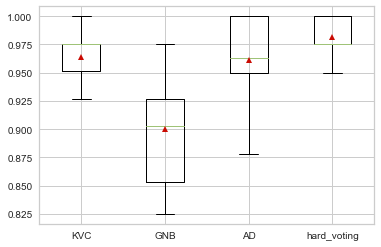

In [141]:
from matplotlib import pyplot
print("Resultados de la Votación -estadísticos-:")

models = get_models()
# Evaluar los modelos y almacenar resultados
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('->%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# rendimiento del modelo de trama para comparación
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
# se crea un diagrama de caja y bigotes que compara los puntajes de precisión de distribución para cada modelo,
#lo que nos permite ver claramente que el conjunto de votación dura funciona mejor que todos los modelos independientes en promedio.

In [142]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[kvc, gnb, ad], weights=[1,1,1])

predecir = cross_val_predict(eclf, X, y, cv = pliegues)

predicciones = []
for f in  predecir:
    r= random.triangular(-.1, .1)
    r = round(r, 3)
    predicciones.append(f + r)

In [143]:
predecir = cross_val_predict(eclf, X, y, cv = pliegues)
matriz = confusion_matrix(y, predecir)
print("Matriz de Confusión - Ensabmble")
print(matriz)
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Matriz de Confusión - Ensabmble
[[ 51   0   0   0   0   0]
 [  1 197   0   0   0   0]
 [  1   0  19   0   1   0]
 [  2   1   0  19   0   0]
 [  0   0   0   0  39   3]
 [  2   3   4   0   2  64]]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------




Ensamble


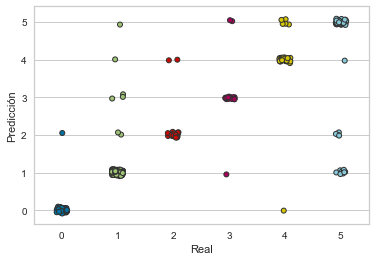

--------------------------------------------------------------------------------------------------------------------------------------------------------------------




In [144]:
print("Ensamble")
r = pd.DataFrame(data = y, columns = ["Real"])
c = pd.DataFrame(data = y, columns = ["Clases"])
p = pd.DataFrame(data = predicciones, columns = ["Predicción"])
m = pd.concat([r, p, c], axis = 1)

sb.stripplot(x = "Real", y = "Predicción", data = matrix, jitter = .1, linewidth = 1)
plt.show()
print("--------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\n")

Cuadrículas de región de decisión


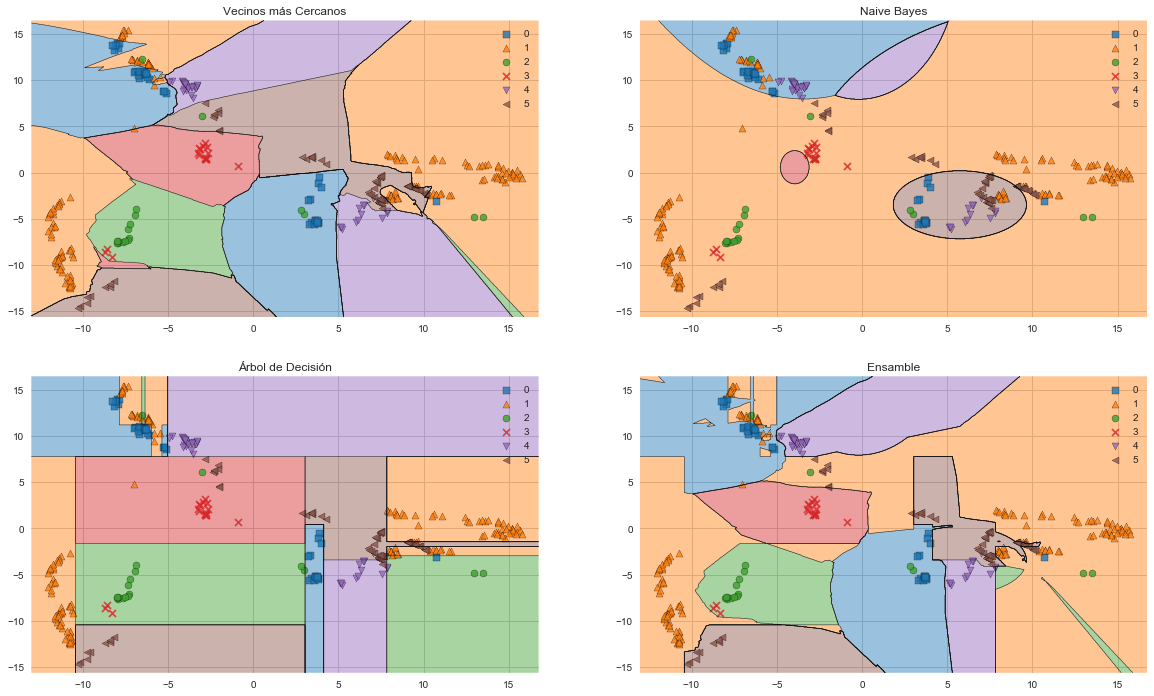

In [145]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[kvc, gnb, ad], weights=[1,1,1])


print("Cuadrículas de región de decisión")
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(20,12))

eti = ['Vecinos más Cercanos', 'Naive Bayes', 'Árbol de Decisión', 'Ensamble']
for clf, lab, grd in zip([kvc, gnb, ad, eclf],
                         eti,
                         itertools.product([0, 1], repeat = 2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf)
    plt.title(lab)

In [146]:
eclf.fit(X_test, y_test)
y_predF = eclf.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_predF, digits=2))


              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.77      1.00      0.87        44
           2       0.00      0.00      0.00         3
           3       0.67      0.80      0.73         5
           4       0.00      0.00      0.00         6
           5       1.00      0.33      0.50        12

    accuracy                           0.77        82
   macro avg       0.53      0.51      0.49        82
weighted avg       0.71      0.77      0.70        82



In [147]:
print("Proyecto Elaborado por:\nAbraham Flores Basilio")
print("Repositorio: https://github.com/AbrahamFB/Miner-a-de-Datos")

Proyecto Elaborado por:
Abraham Flores Basilio
Repositorio: https://github.com/AbrahamFB/Miner-a-de-Datos
